In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
import matplotlib.pyplot as plt
import tensorflow as tf

In [54]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

**the first sample for the production county , product type is_business : 010**

In [89]:
file= '../data/poduction.csv'
data=pd.read_csv(file)
cluster=pd.read_csv('../clustering/clutser_client_production_pdf.csv')

#grouped_data = data.groupby(['county', 'product_type', 'is_business'])



In [56]:
clustering=pd.merge(data,cluster, on=['county', 'product_type', 'is_business'],how='inner')

In [44]:
clustering

Unnamed: 0.1  Unnamed: 0    datetime  product_type  county  eic_count  \
0                  0           0  2021-09-01             1       0        108   
1                  1          58  2021-09-01             1       0        108   
2                  2         116  2021-09-01             1       0        108   
3                  3         174  2021-09-01             1       0        108   
4                  4         232  2021-09-01             1       0        108   
...              ...         ...         ...           ...     ...        ...   
439417        439417      445620  2023-05-29             0      11          9   
439418        439418      445683  2023-05-29             0      11          9   
439419        439419      445746  2023-05-29             0      11          9   
439420        439420      445809  2023-05-29             0      11          9   
439421        439421      445872  2023-05-29             0      11          9   

        installed_capacity  is_business  target  temperature  ...  \
0                   952.89            0   0.713    13.600000  ...   
1                   952.89            0   1.132    13.566667  ...   
2                   952.89            0   0.490    13.100000  ...   
3                   952.89            0   0.496    12.716667  ...   
4                   952.89            0   0.149    12.366667  ...   
...                    ...          ...     ...          ...  ...   
439417              470.00            1  13.493    10.850000  ...   
439418              470.00            1  46.544    12.200000  ...   
439419              470.00            1  71.673    13.250000  ...   
439420              470.00            1  85.398    13.825000  ...   
439421              470.00            1  35.109    14.250000  ...   

        elect_prices  hour  dayofweek  quarter  month  year  dayofyear  day  \
0              92.51     0          2        3      9  2021        244    1   
1              88.90     0          2        3      9  2021        244    1   
2              87.35     0          2        3      9  2021        244    1   
3              86.88     0          2        3      9  2021        244    1   
4              88.43     0          2        3      9  2021        244    1   
...              ...   ...        ...      ...    ...   ...        ...  ...   
439417         66.66     0          0        2      5  2023        149   29   
439418         58.71     0          0        2      5  2023        149   29   
439419         29.92     0          0        2      5  2023        149   29   
439420          4.03     0          0        2      5  2023        149   29   
439421          3.49     0          0        2      5  2023        149   29   

        client_id  Cluster  
0               2        2  
1               2        2  
2               2        2  
3               2        2  
4               2        2  
...           ...      ...  
439417         46        4  
439418         46        4  
439419         46        4  
439420         46        4  
439421         46        4  

[439422 rows x 32 columns]

In [90]:
grouped_data = data.groupby(['county', 'product_type', 'is_business'])


df = grouped_data.get_group((0, 1, 0))

train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [6]:
import tensorflow as tf 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# List each GPU
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)


TensorFlow version: 2.16.1
Num GPUs Available:  0


trainX shape == (5547, 48, 17).
trainY shape == (5547, 1).


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_32 (GRU)                         │ (None, 10)                  │             870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 1.7813 - val_loss: 0.3305
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.9034 - val_loss: 0.1984
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.7315 - val_loss: 0.1343
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.6722 - val_loss: 0.1015
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.6352 - val_loss: 0.0885
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.5612 - val_loss: 0.0810
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.5172 - val_loss: 0.0786
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.4736 - val_loss: 0.0707
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4372 - val_loss: 0.0778
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.4140 - val_loss: 0.0605
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.3703 - val_loss: 0.0608
Epoch 12/100
500/500 ━━━

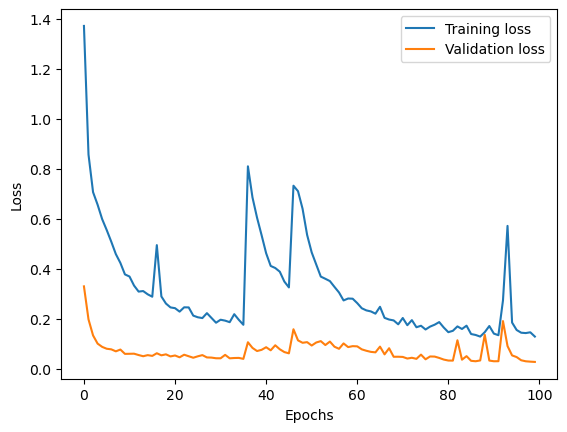

In [101]:
from keras.regularizers import l2 , l1
from keras.regularizers import L1L2  
# Define the columns for training
cols = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']

# Initialize an empty DataFrame to store the scaled data
scaled_data = pd.DataFrame()

df_for_training = train_df[cols].astype(float)
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

trainX = []
trainY = []
n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 48 # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])  # Target column is the last one

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
# Adjusted the activation function to 'tanh', which is also the default if not specified
model.add(GRU(10, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False, kernel_regularizer=L1L2(l1=0.01, l2=0.01)))

# Uncomment and adjust other layers as needed, ensuring activation functions and configurations are compatible
#model.add(GRU(64 ,activation='tanh', return_sequences=True))
#model.add(GRU(32, activation='tanh', return_sequences=True))
#model.add(GRU(64, activation='tanh', return_sequences=True))

#model.add(GRU(32, return_sequences=False,  kernel_regularizer=L1L2(l1=0.01, l2=0.01))) # Activation defaults to 'tanh'
model.add(Dropout(0.2))
model.add(Dense(1))  # Output dimension is 1 as we're predicting a single value
model.compile(optimizer='adam', loss='mse')
model.summary()


history=model.fit(trainX, trainY, epochs=100, batch_size=10, validation_split=0.1, verbose=1)





plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 461ms/step


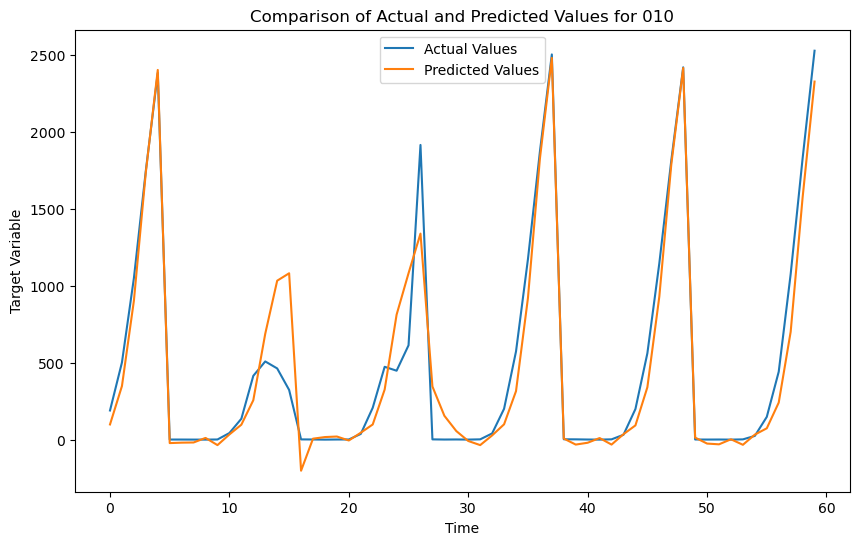

Group: 010
R2 Score: 0.9268815921883835
MSE: 41122.49783045445
RMSE: 202.78682854281845
MAE: 122.65134559666315



In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model
import matplotlib.pyplot as plt

df_test = test_df[cols].astype(float)



# Use the scaler from the training to transform the test data
df_test_scaled1= scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)

# Initialize the lists for testX and testY
testX = []
testY = []
n_future = 1  # Same as during training
n_past = 72 # Same as during training

# Prepare testX and testY
for i in range(n_past, len(df_test_scaled) - n_future + 1):
    testX.append(df_test_scaled[i - n_past:i])
    testY.append(df_test_scaled[i + n_future - 1:i + n_future, -1])  # Assuming the last column is still the target

testX, testY = np.array(testX), np.array(testY)



n_days_for_prediction = 60


target_scaler = StandardScaler()
target_scaler.fit(df_test[['target']])


# Predict on the last n_days_for_prediction
prediction_scaled = model.predict(testX[-n_days_for_prediction:])
prediction = target_scaler.inverse_transform(prediction_scaled)
actual = target_scaler.inverse_transform(testY[-n_days_for_prediction:])

# Calculate the metrics
r2 = r2_score(actual, prediction)
mse = mean_squared_error(actual, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, prediction)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Values')
plt.plot(prediction, label='Predicted Values')
plt.title(f'Comparison of Actual and Predicted Values for 010')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Print metrics
print(f"Group: 010")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")

# TRY THIS MODEL WITH CLIENTS IN THE SAME CLUSTER ? JUST I want put as historic a 48 hours and let's see the results 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

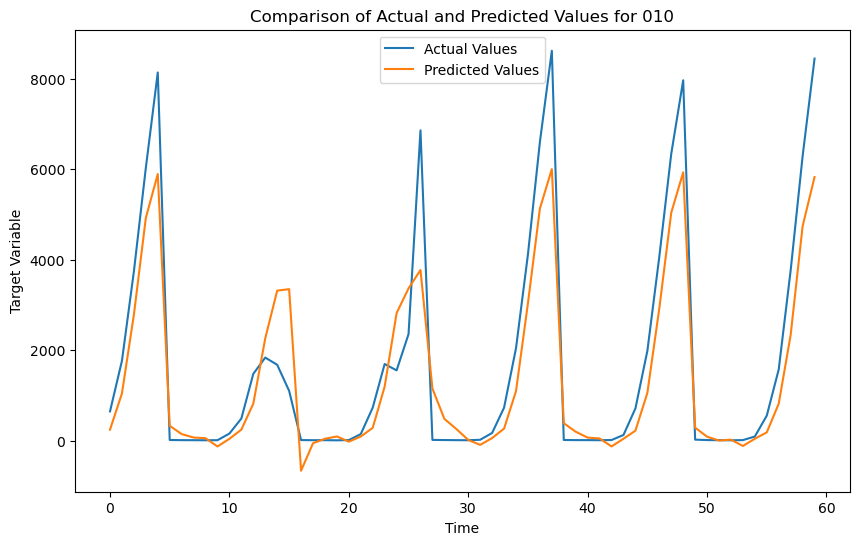

Group: 010
R2 Score: 0.8415000203299856
MSE: 1047877.624298422
RMSE: 1023.6589394414635
MAE: 689.8770920015336



In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model
import matplotlib.pyplot as plt



df1 = grouped_data.get_group((0, 3, 0))

df1 = df1[cols].astype(float)



# Use the scaler from the training to transform the test data
df1_scaled= scaler.fit(df1)
df1_scaled1 = scaler.transform(df1)

# Initialize the lists for testX and testY
testX1 = []
testY1 = []


# Prepare testX and testY
for i in range(n_past, len(df1_scaled1) - n_future + 1):
    testX1.append(df1_scaled1[i - n_past:i])
    testY1.append(df1_scaled1[i + n_future - 1:i + n_future, -1])  # Assuming the last column is still the target

testX1, testY1 = np.array(testX1), np.array(testY1)



n_days_for_prediction = 60



target_scaler = StandardScaler()
target_scaler.fit(df1[['target']])


# Predict on the last n_days_for_prediction
prediction_scaled = model.predict(testX1[-n_days_for_prediction:])
prediction = target_scaler.inverse_transform(prediction_scaled)
actual = target_scaler.inverse_transform(testY1[-n_days_for_prediction:])

# Calculate the metrics
r2 = r2_score(actual, prediction)
mse = mean_squared_error(actual, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, prediction)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Values')
plt.plot(prediction, label='Predicted Values')
plt.title(f'Comparison of Actual and Predicted Values for 010')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Print metrics
print(f"Group: 010")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

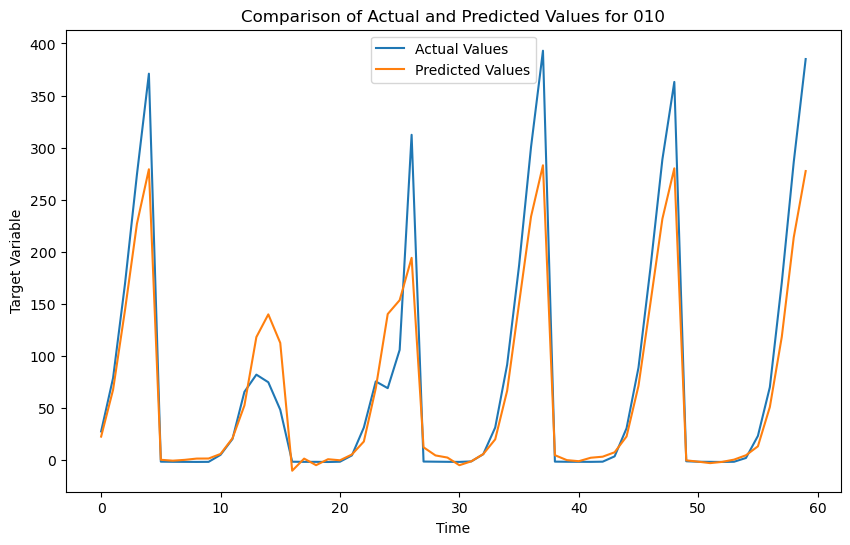

Group: 010
R2 Score: 0.8879424781522595
MSE: 1561.0157463720782
RMSE: 39.509691803051034
MAE: 23.56492984123537



In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model
import matplotlib.pyplot as plt


df2 = grouped_data.get_group((0,0,1))

df2 = df2[cols].astype(float)



# Use the scaler from the training to transform the test data
df2_scaled= scaler.fit(df2)
df2_scaled1 = scaler.transform(df2)

# Initialize the lists for testX and testY
testX2 = []
testY2 = []

# Prepare testX and testY
for i in range(n_past, len(df1_scaled1) - n_future + 1):
    testX2.append(df2_scaled1[i - n_past:i])
    testY2.append(df2_scaled1[i + n_future - 1:i + n_future, -1])  # Assuming the last column is still the target

testX2, testY2 = np.array(testX1), np.array(testY1)



n_days_for_prediction = 60



target_scaler = StandardScaler()
target_scaler.fit(df2[['target']])


# Predict on the last n_days_for_prediction
prediction_scaled = model.predict(testX2[-n_days_for_prediction:])
prediction = target_scaler.inverse_transform(prediction_scaled)
actual = target_scaler.inverse_transform(testY2[-n_days_for_prediction:])

# Calculate the metrics
r2 = r2_score(actual, prediction)
mse = mean_squared_error(actual, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, prediction)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Values')
plt.plot(prediction, label='Predicted Values')
plt.title(f'Comparison of Actual and Predicted Values for 010')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Print metrics
print(f"Group: 010")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}


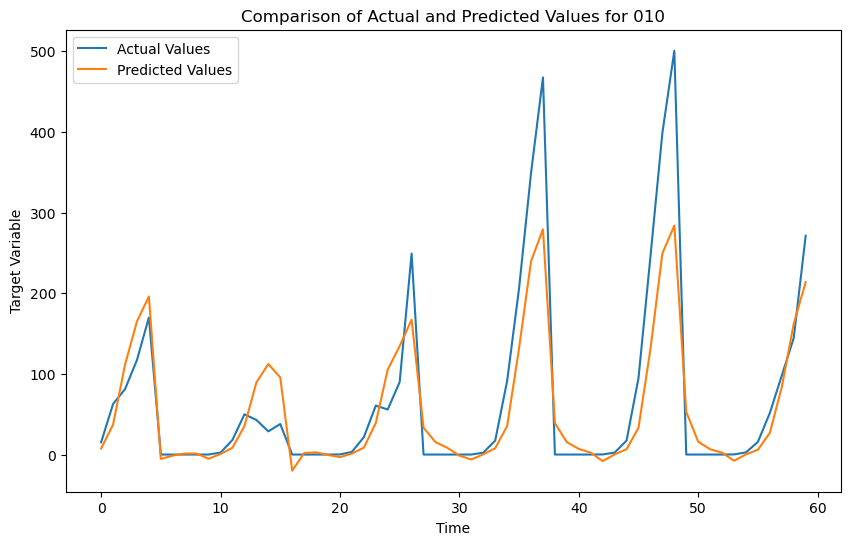

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}


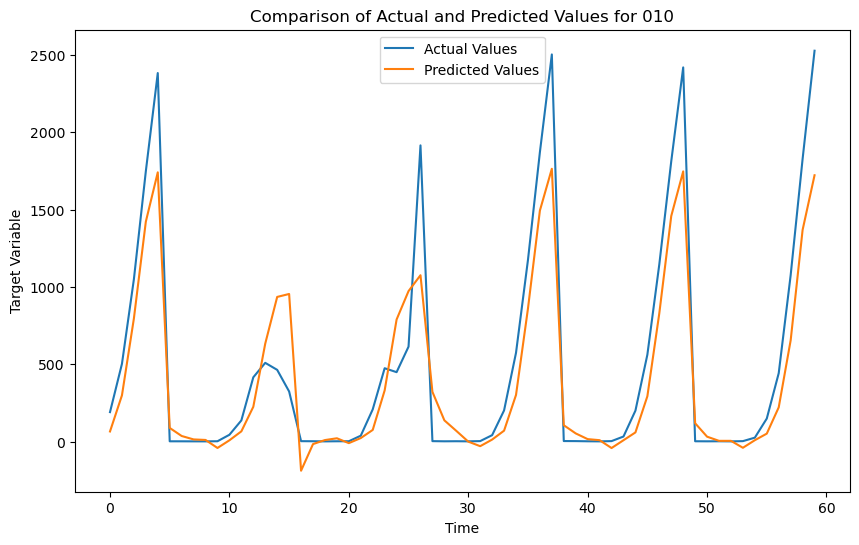

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}


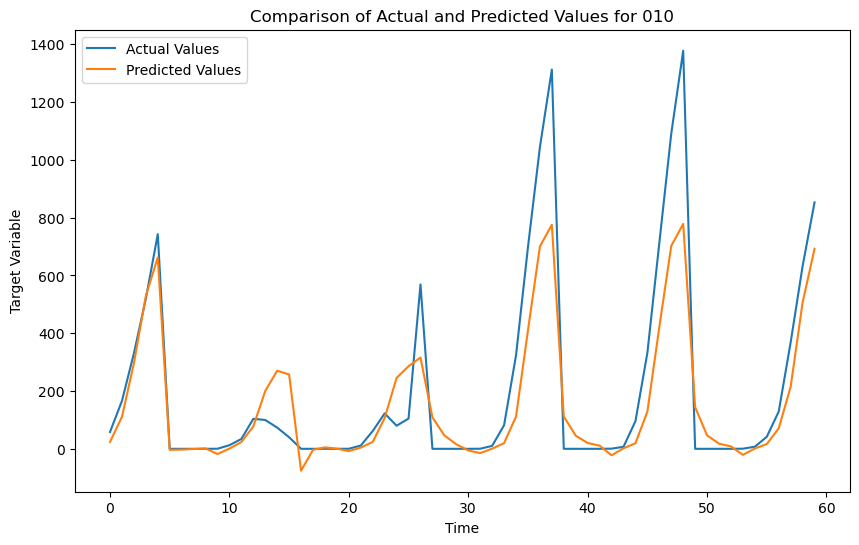

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}


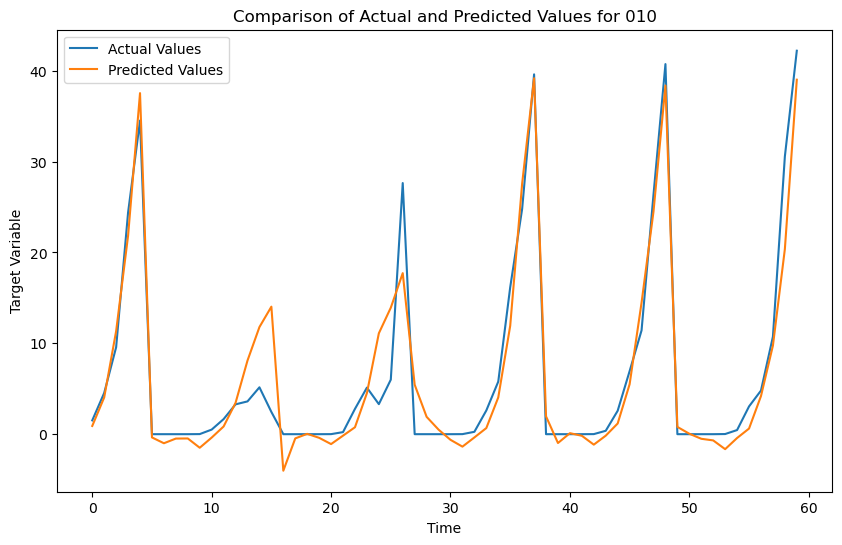

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}


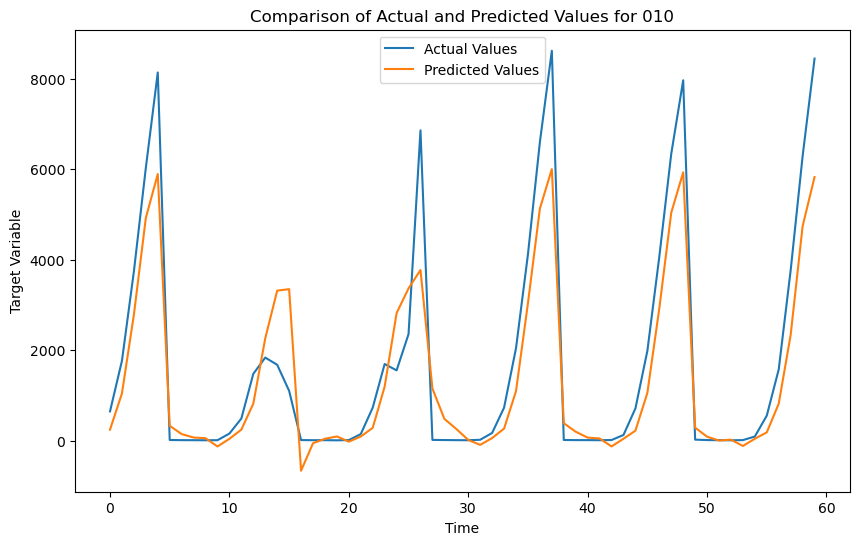

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}


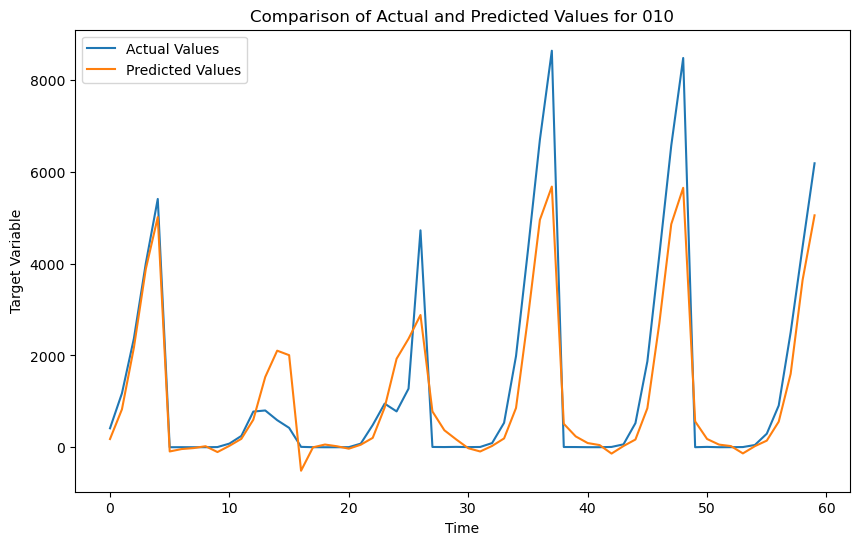

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}


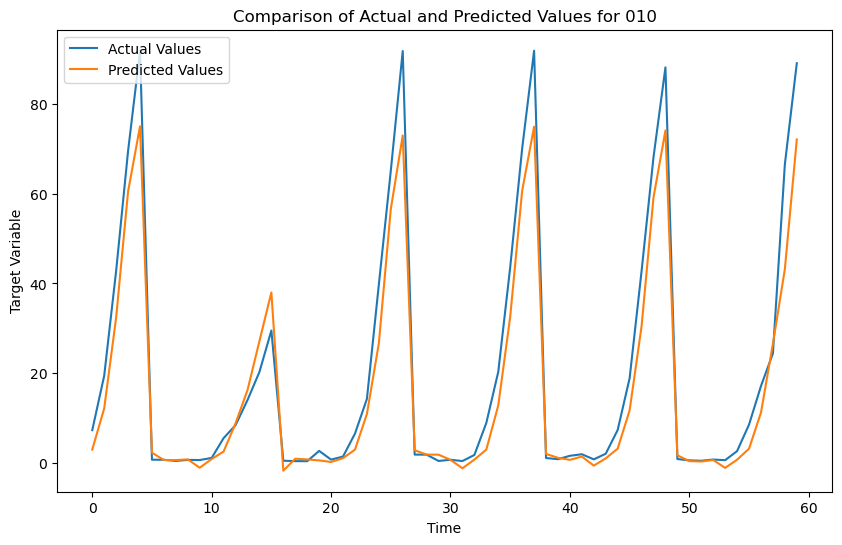

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

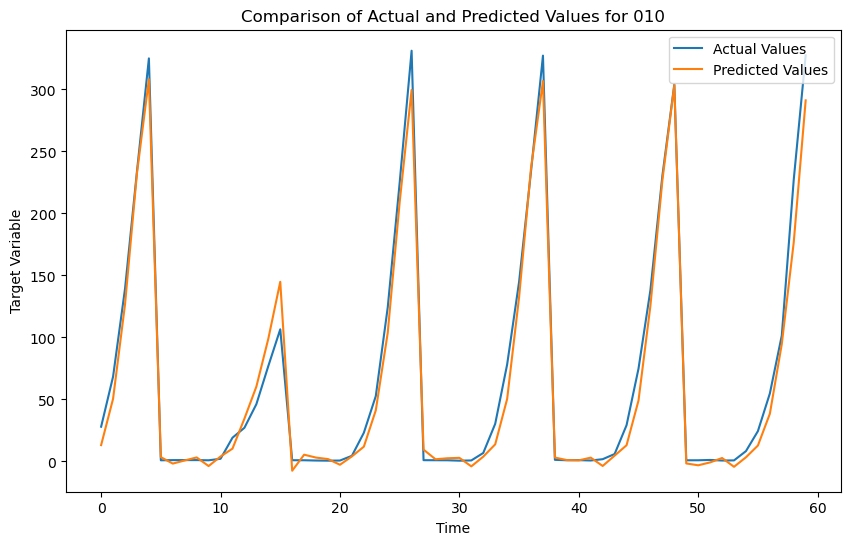

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

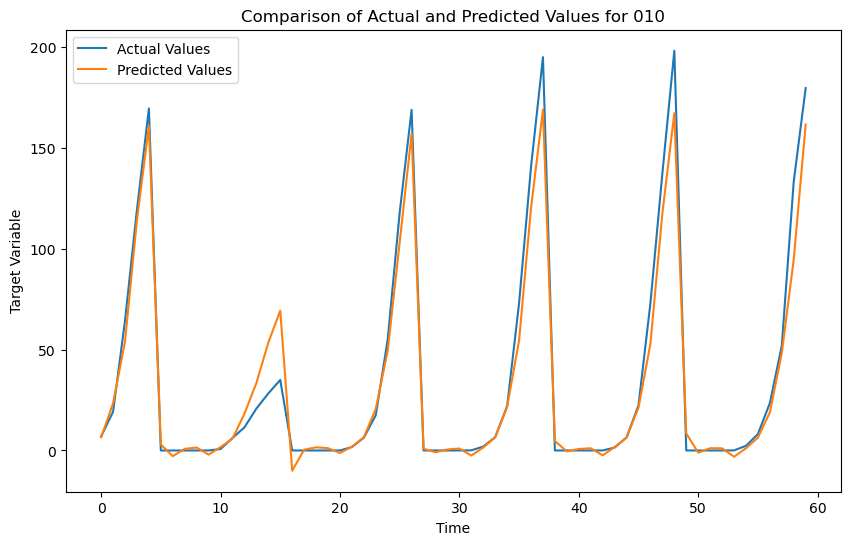

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

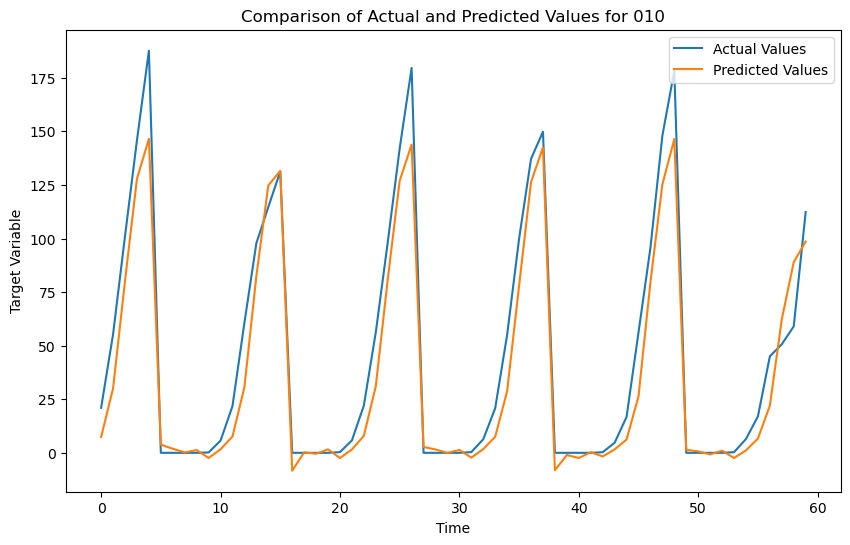


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

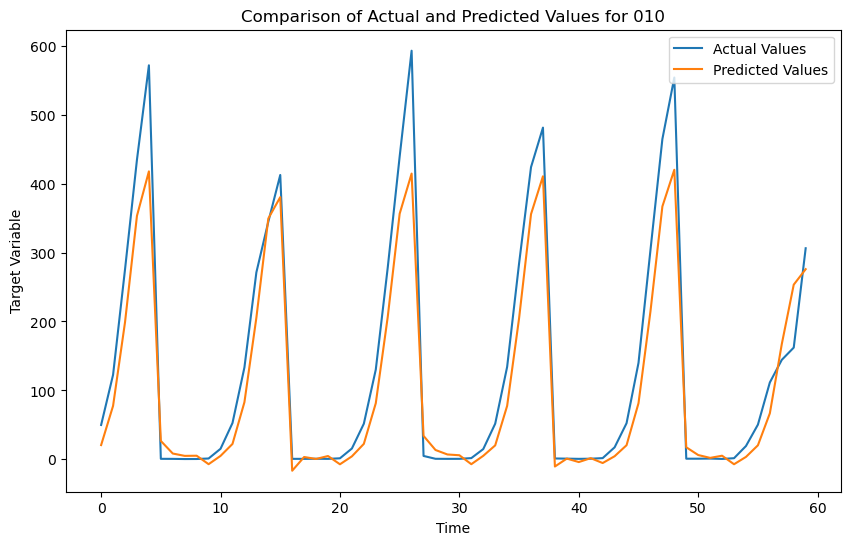


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

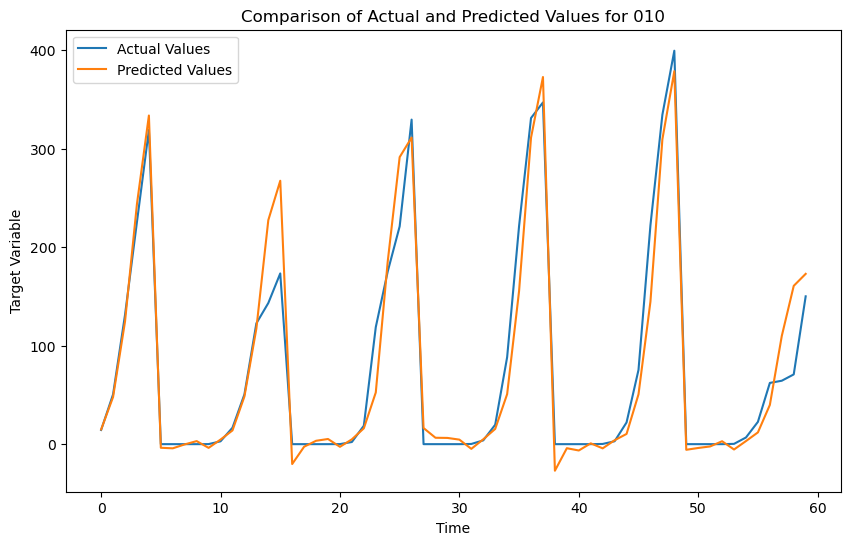


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

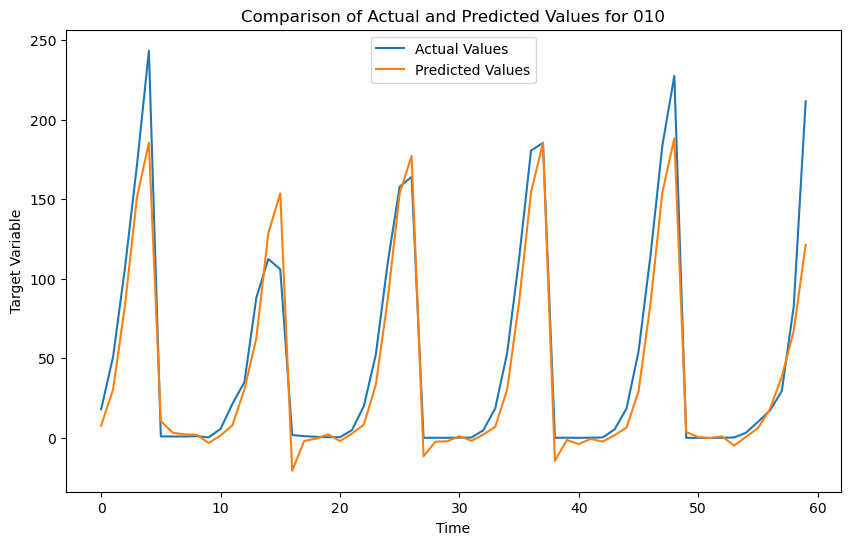

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

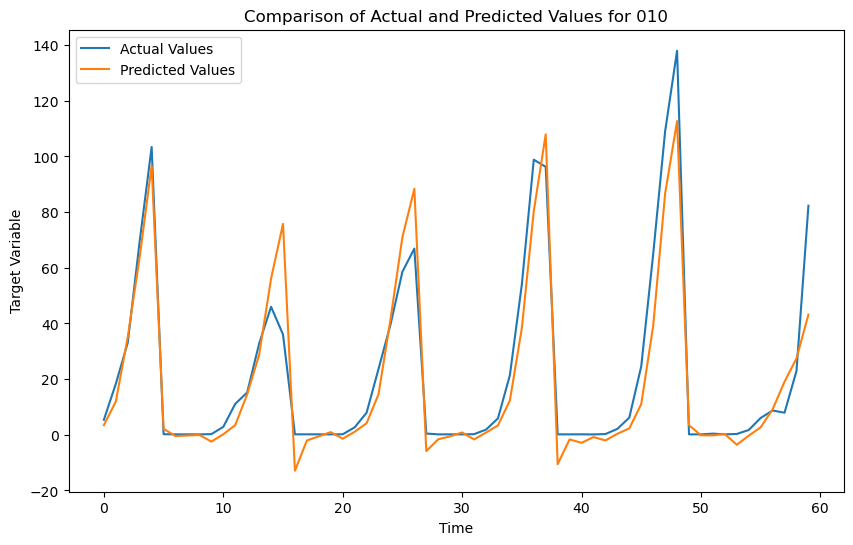

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

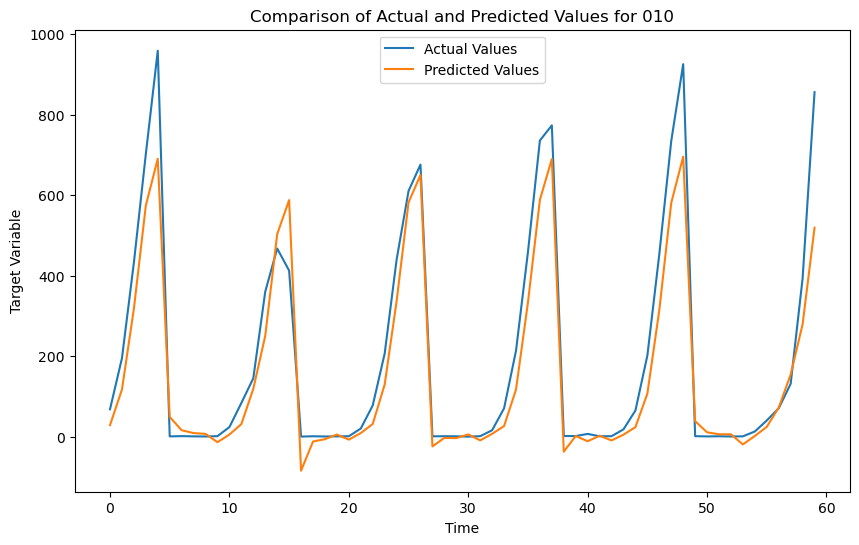

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

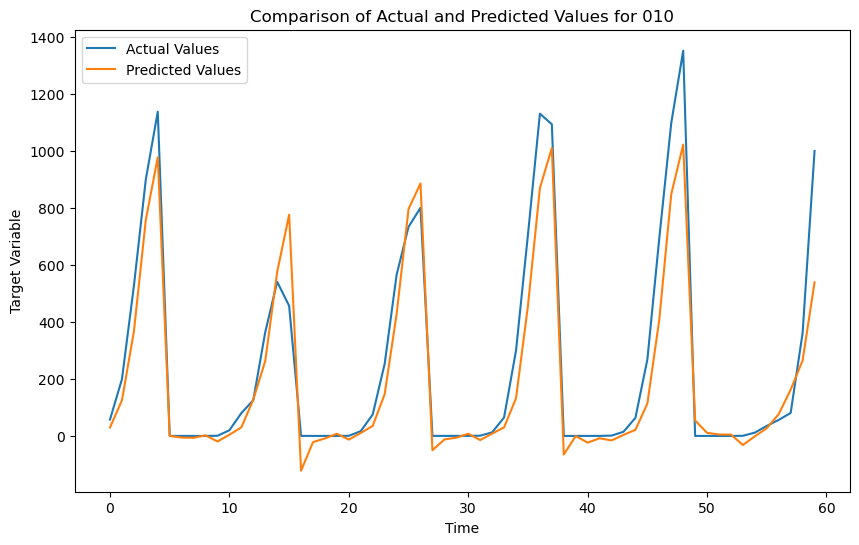

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

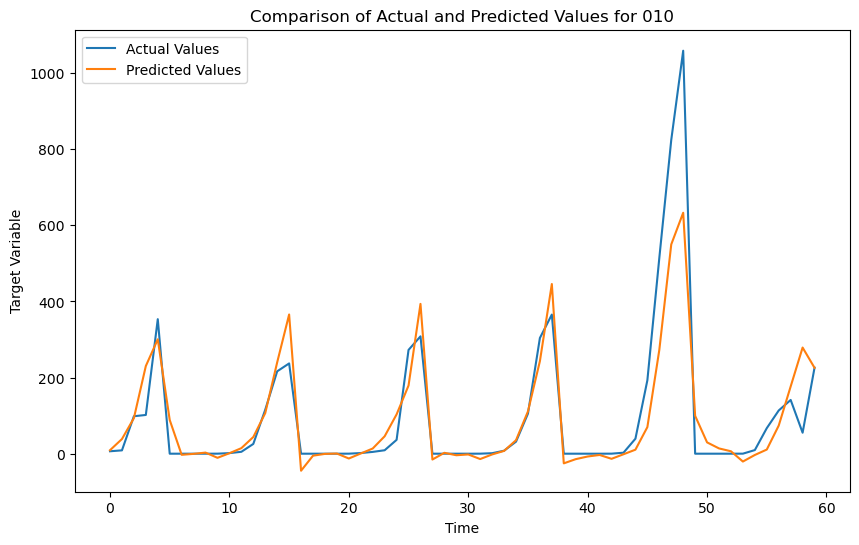

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

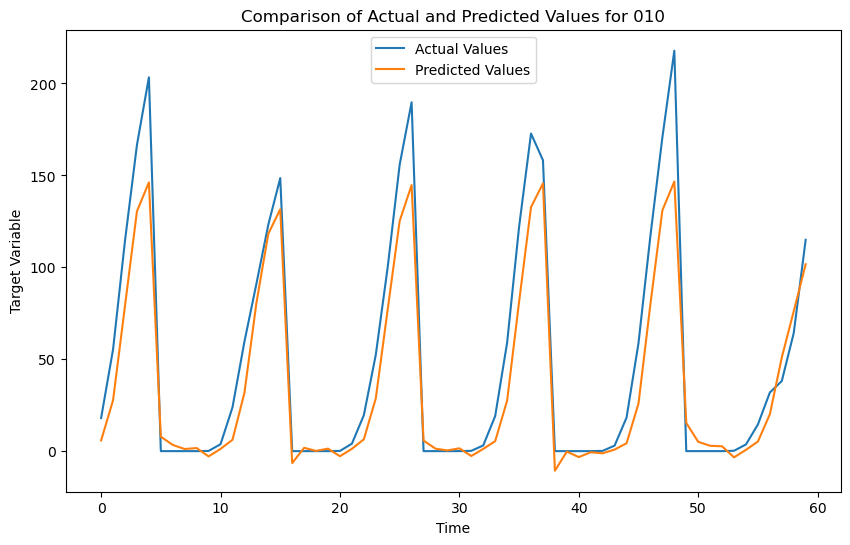

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

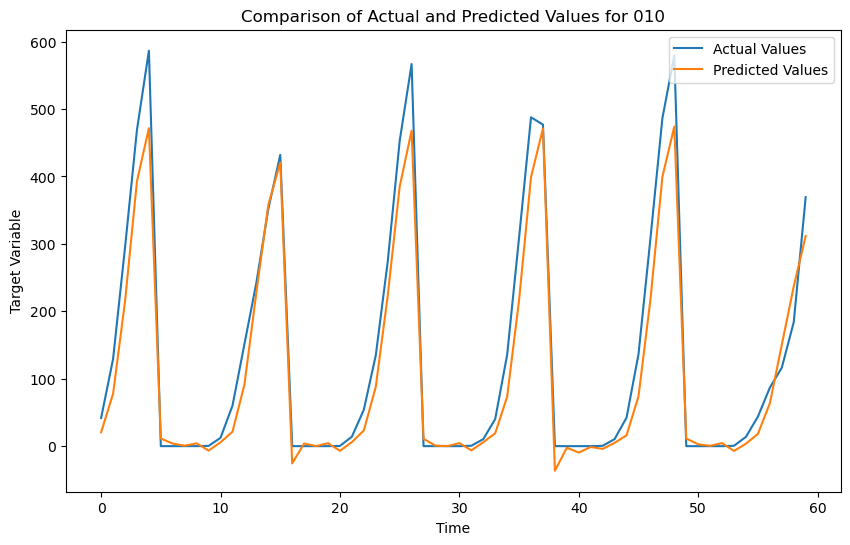

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

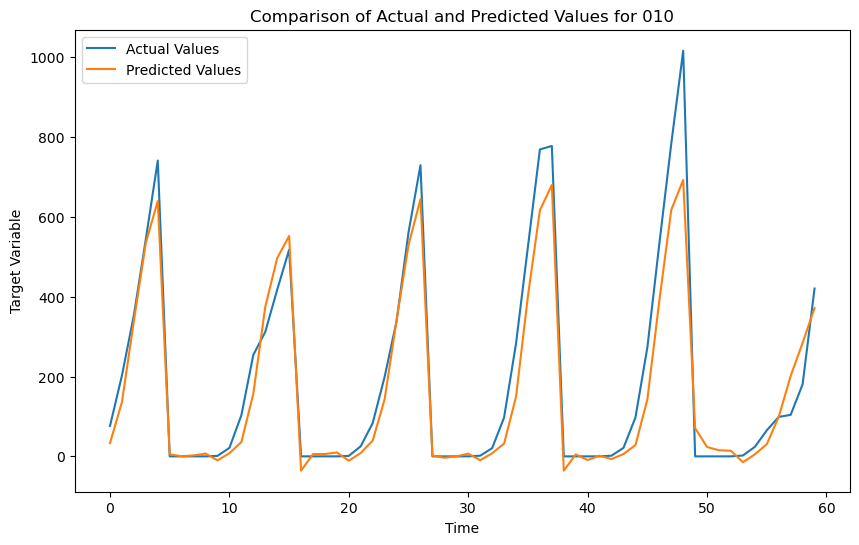

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

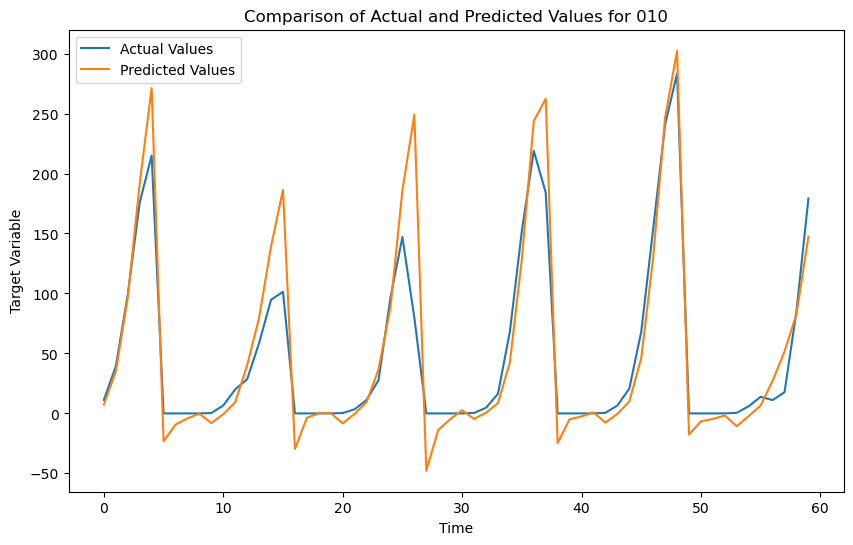

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

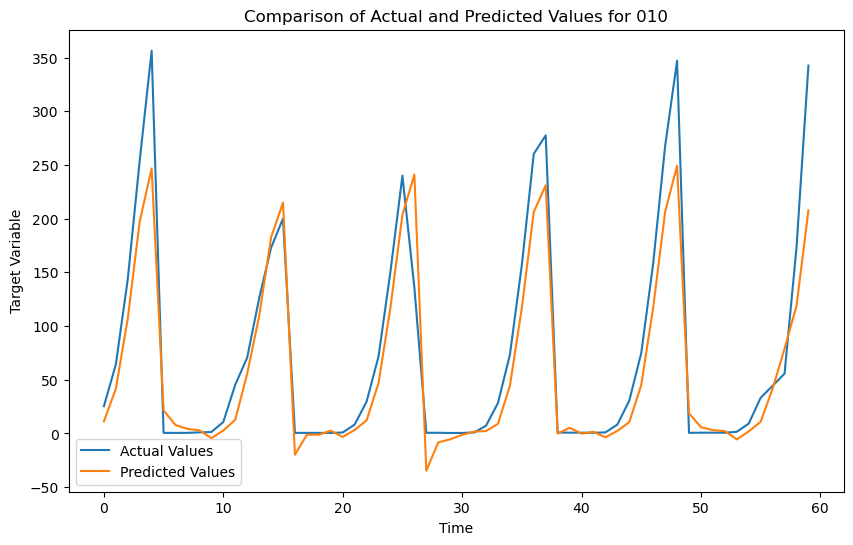

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

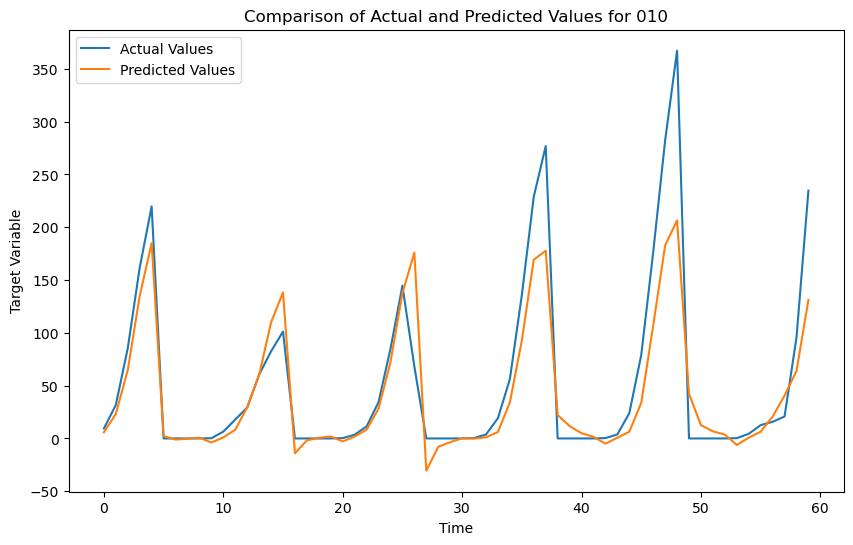

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

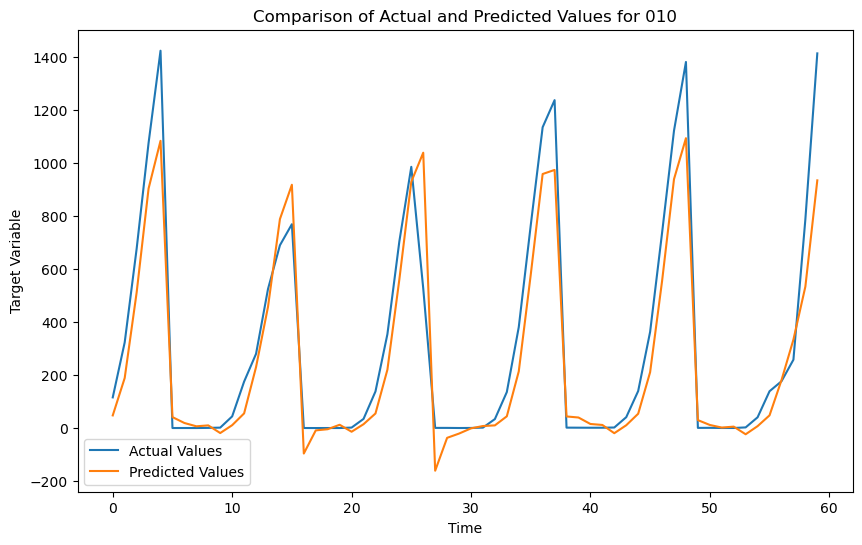

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

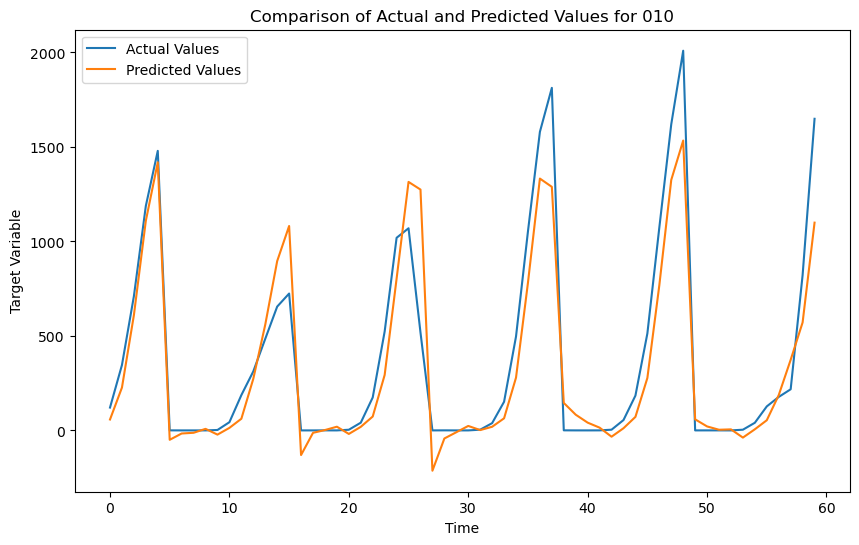


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

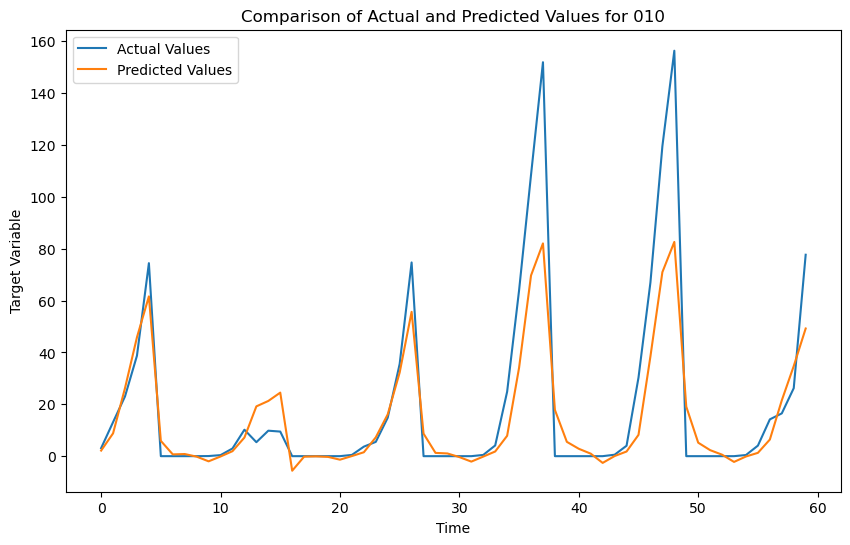

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

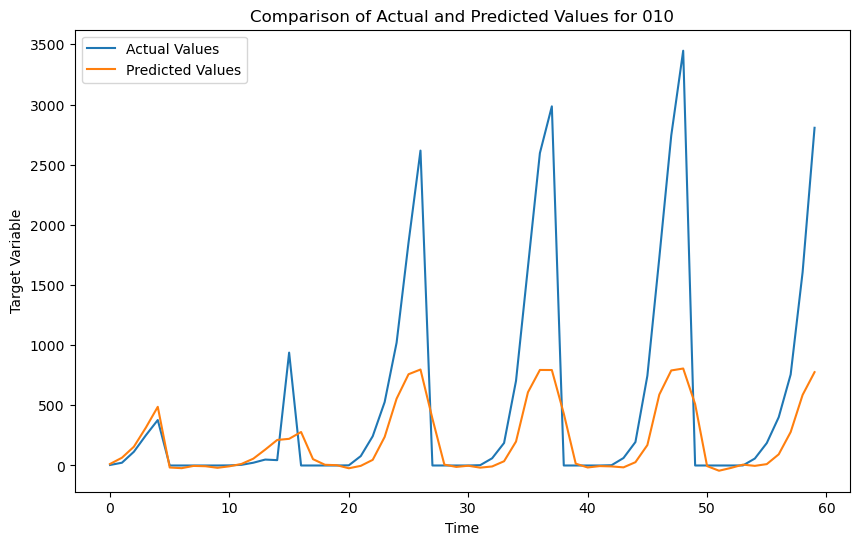

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

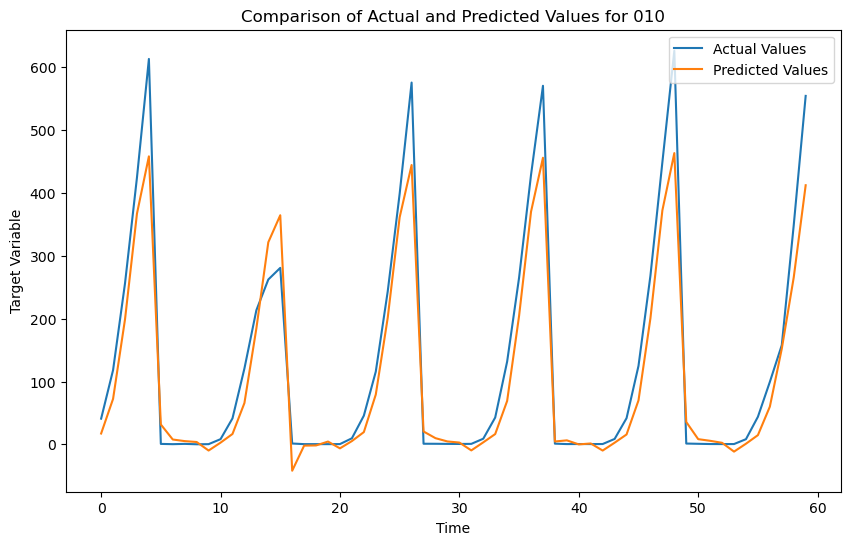

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

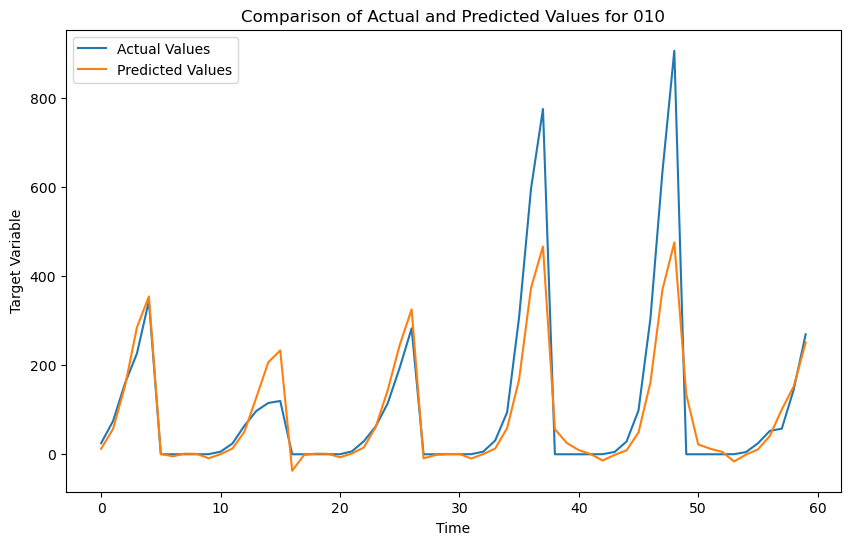


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

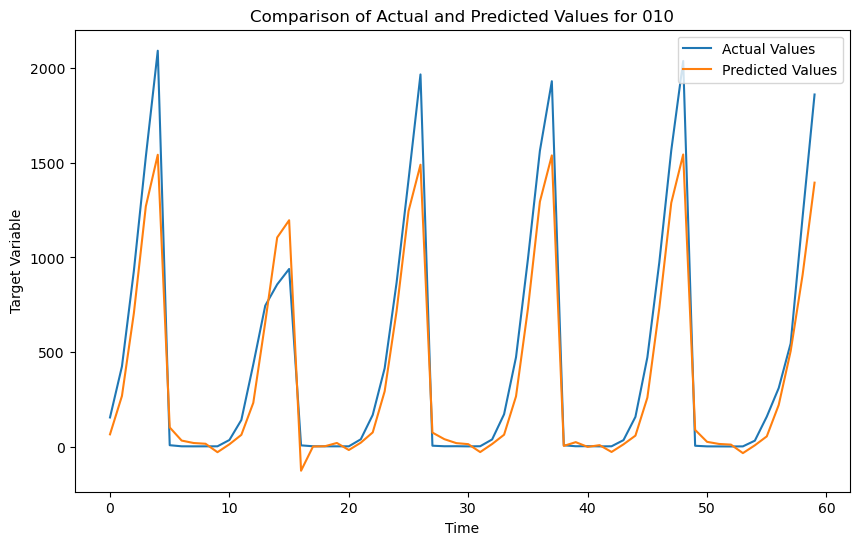


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

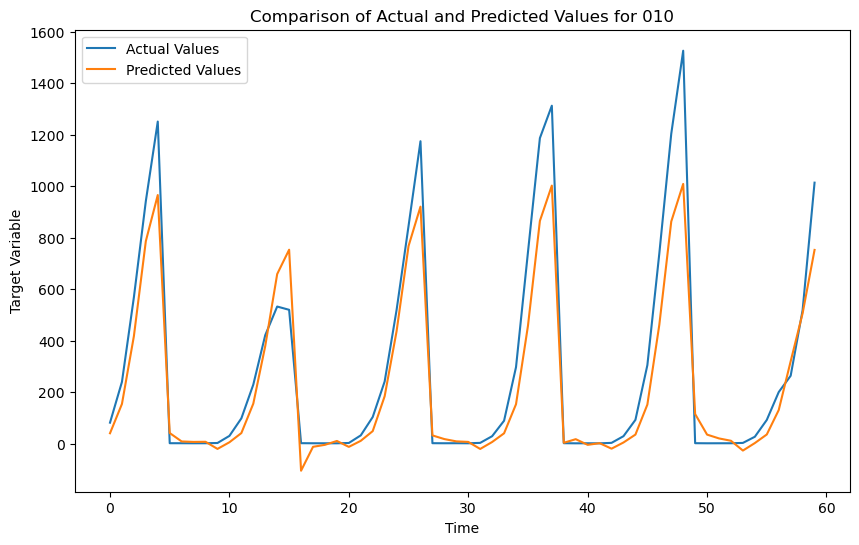


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

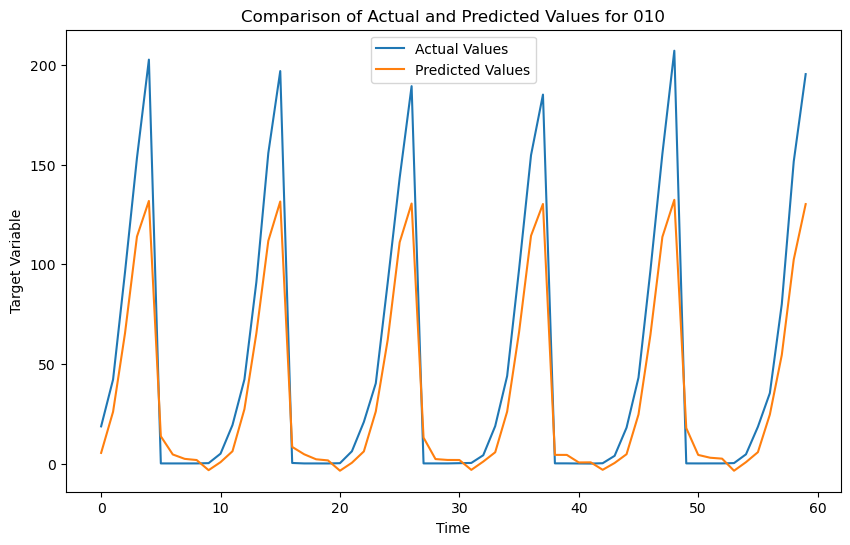

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

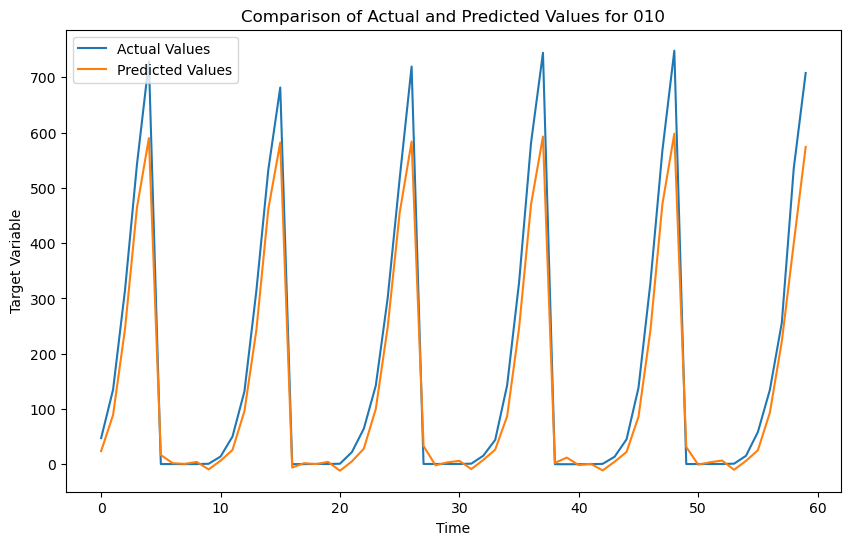

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

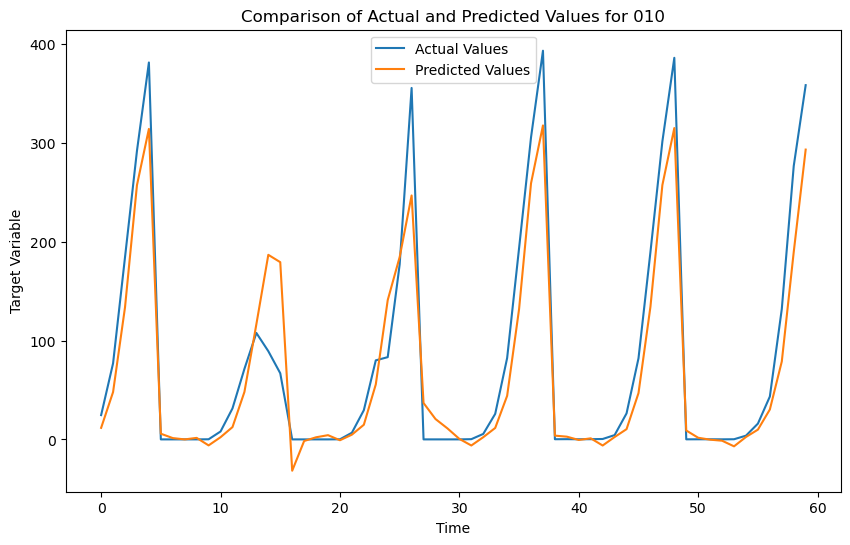

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

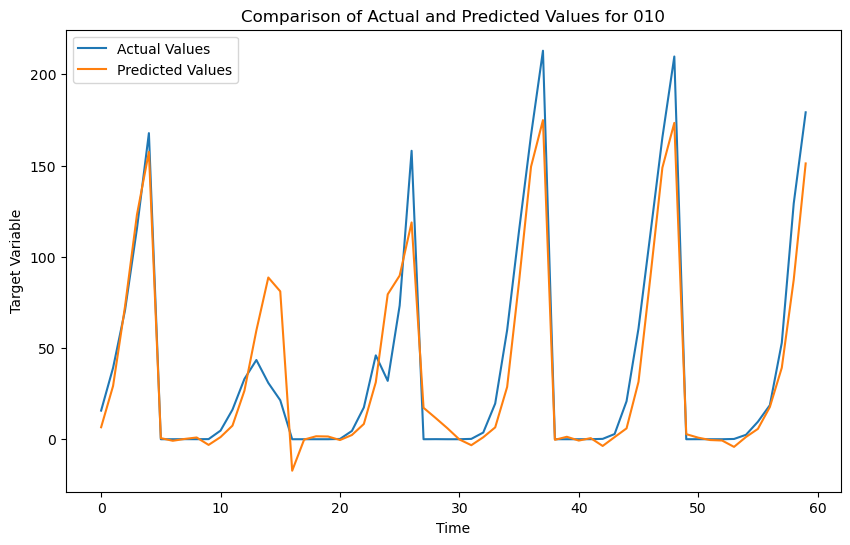


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

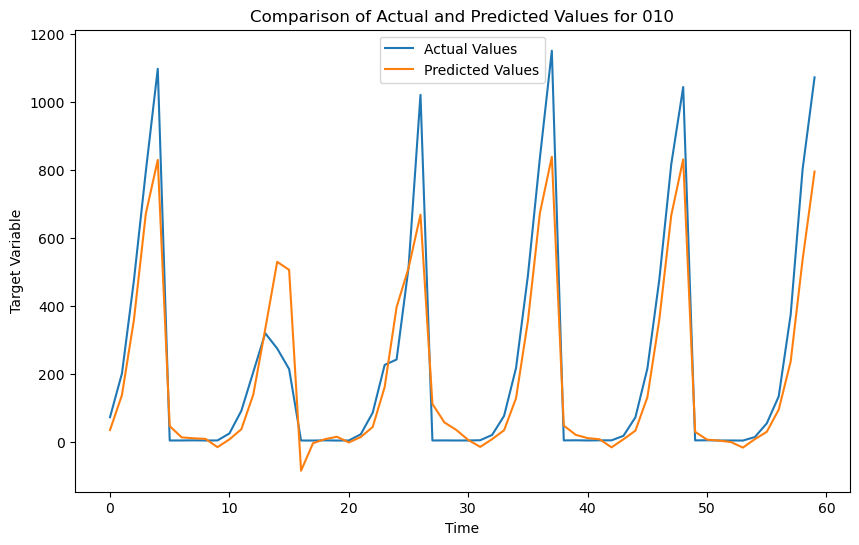


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

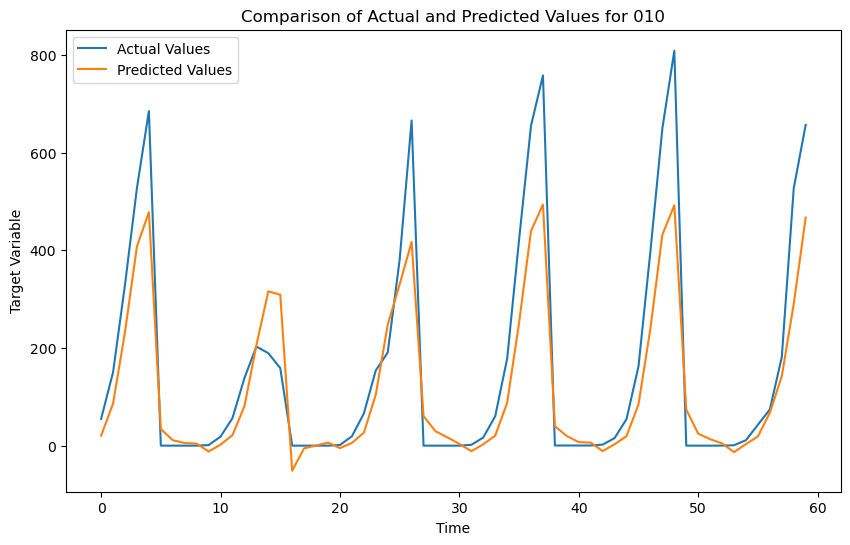


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

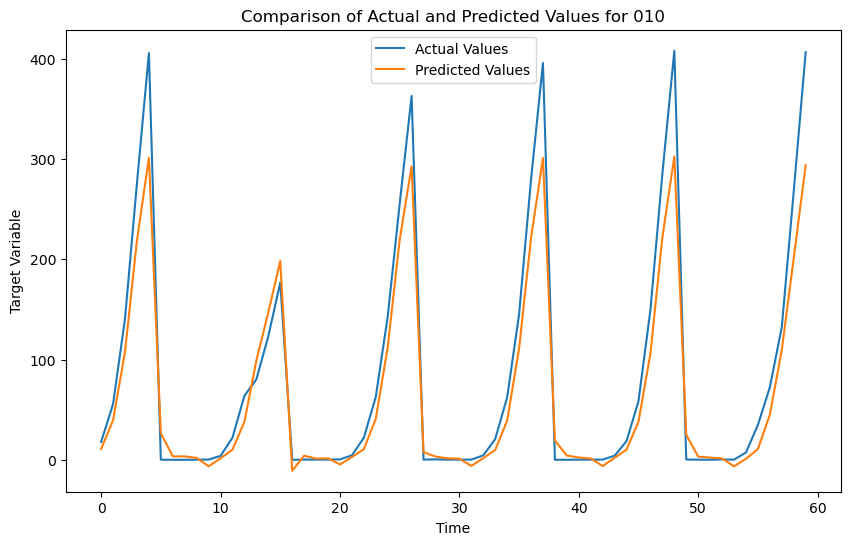

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

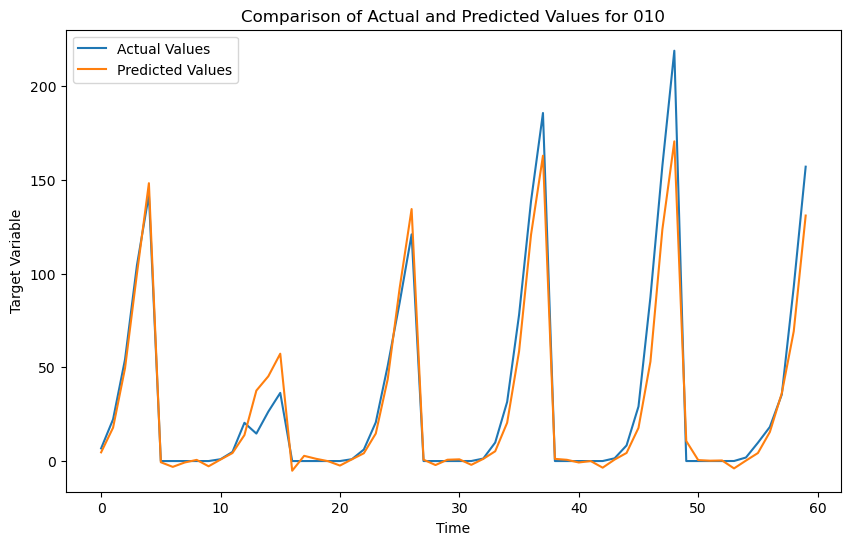

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

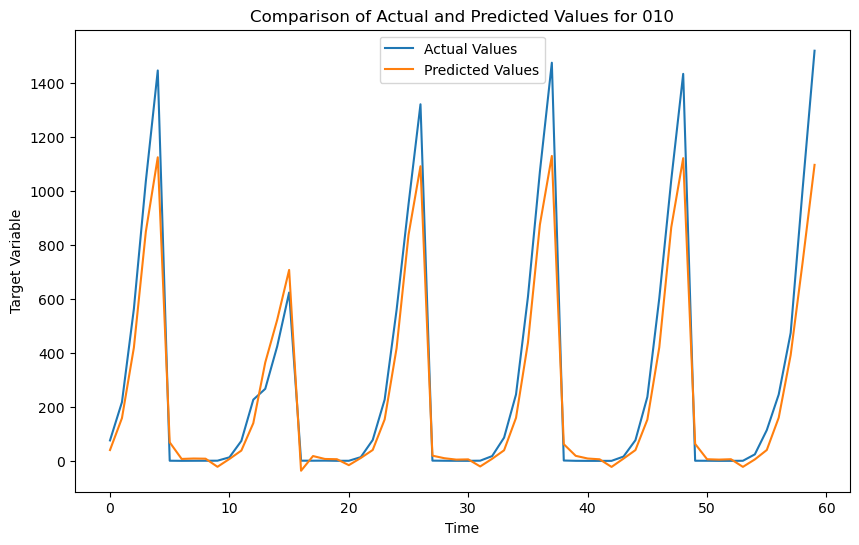

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

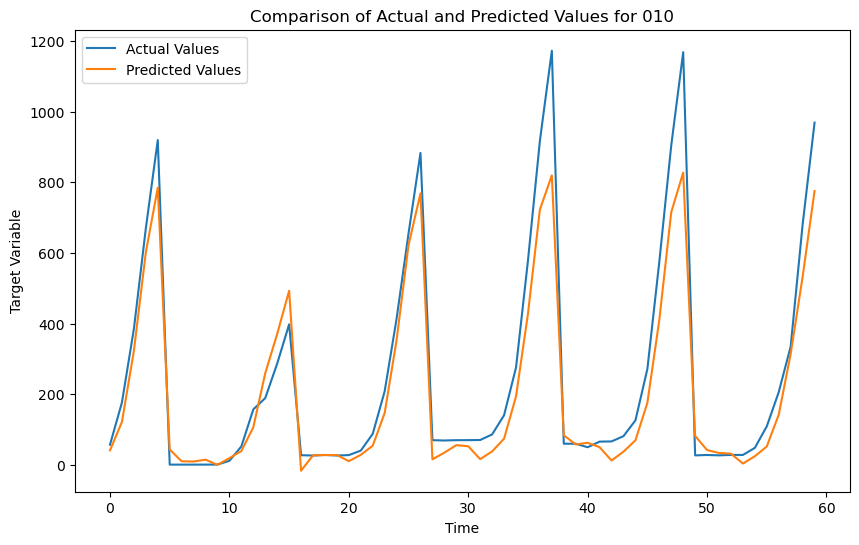

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

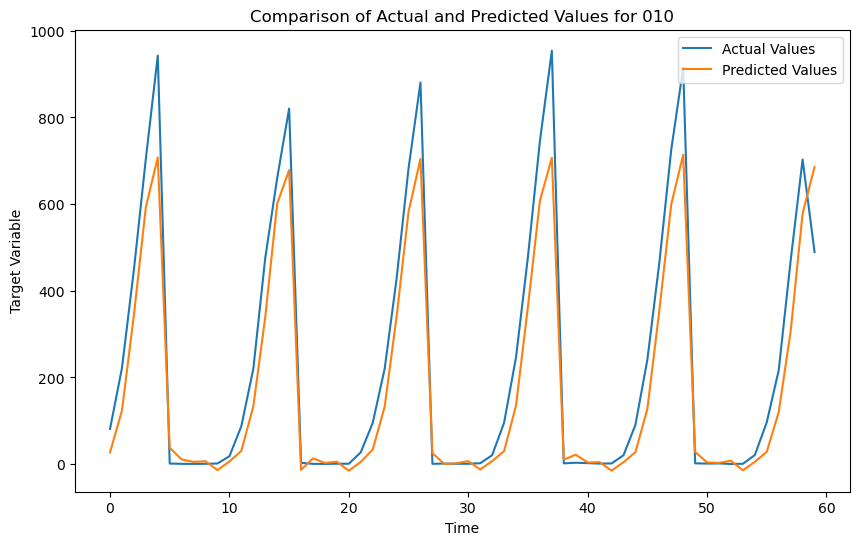

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

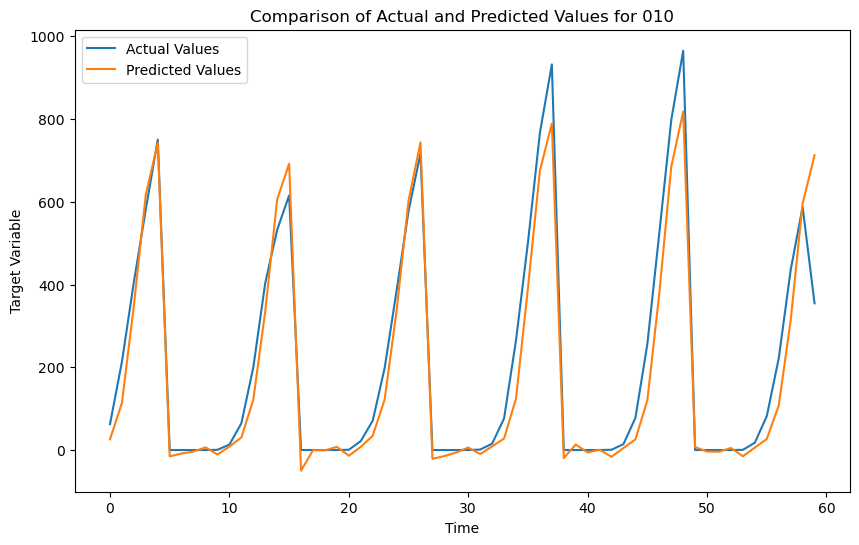

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

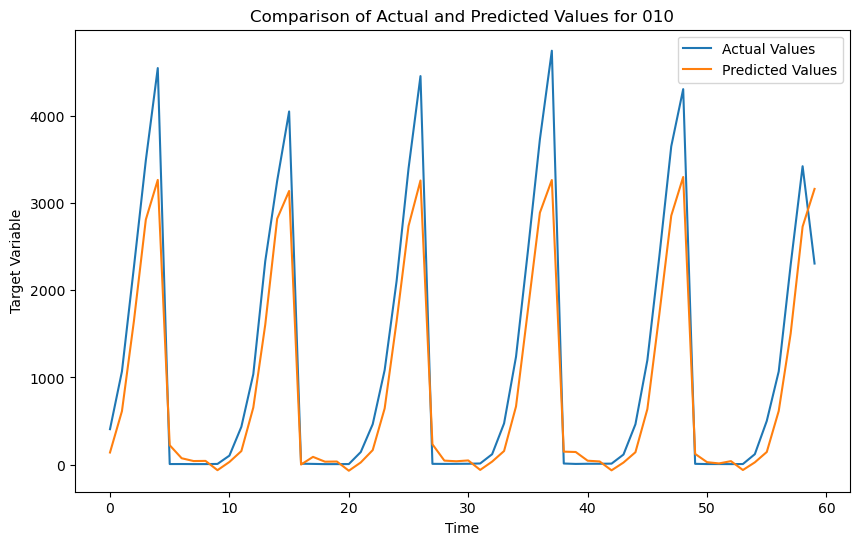

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

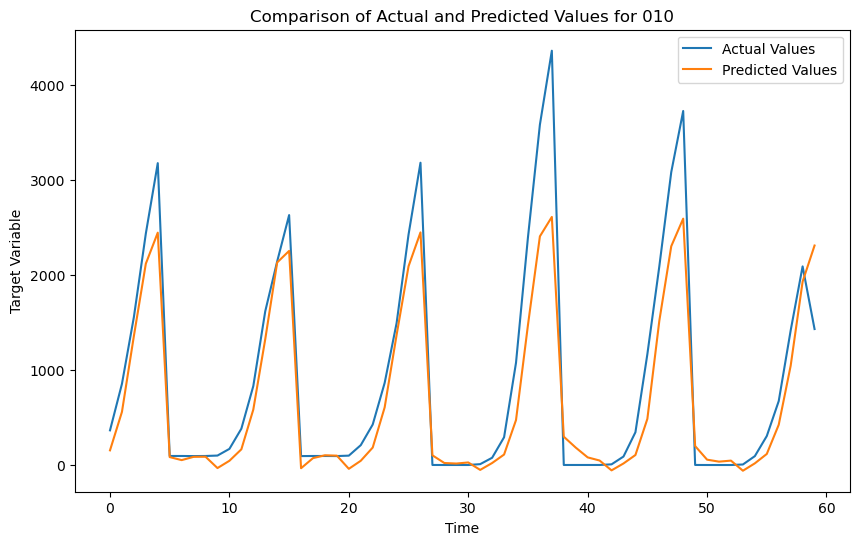

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

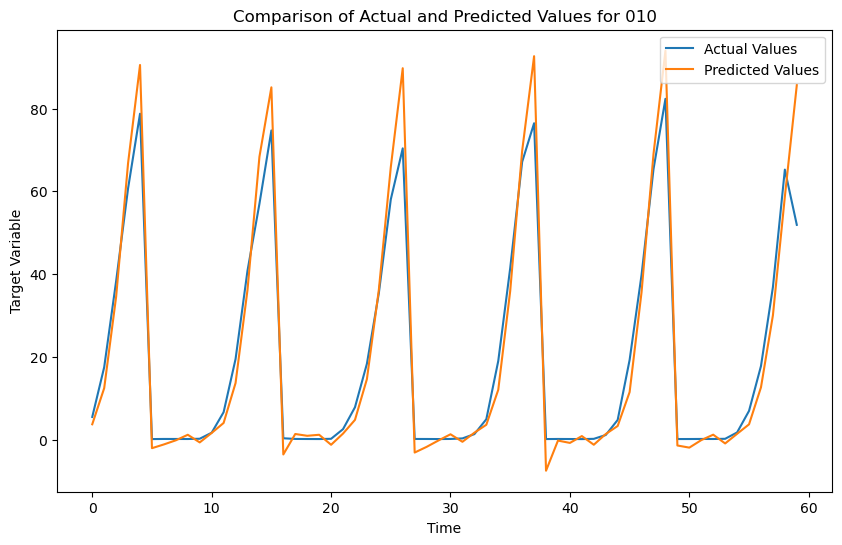

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

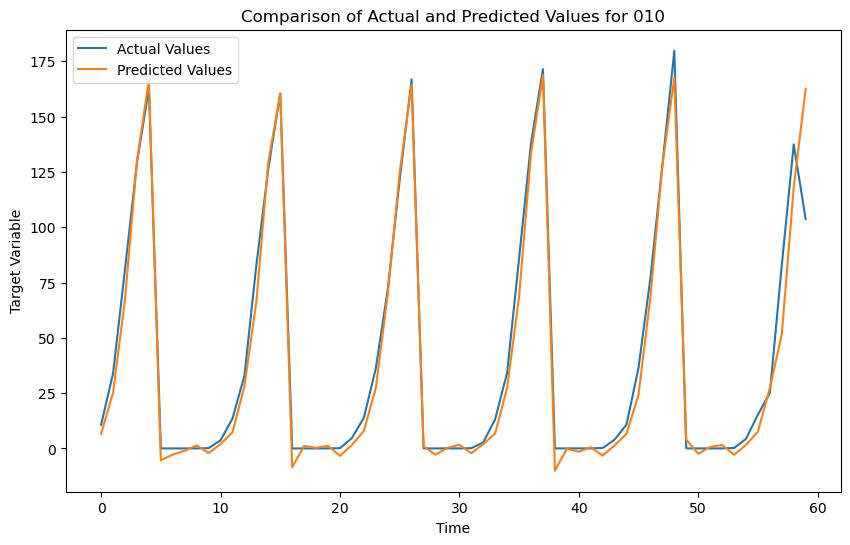

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

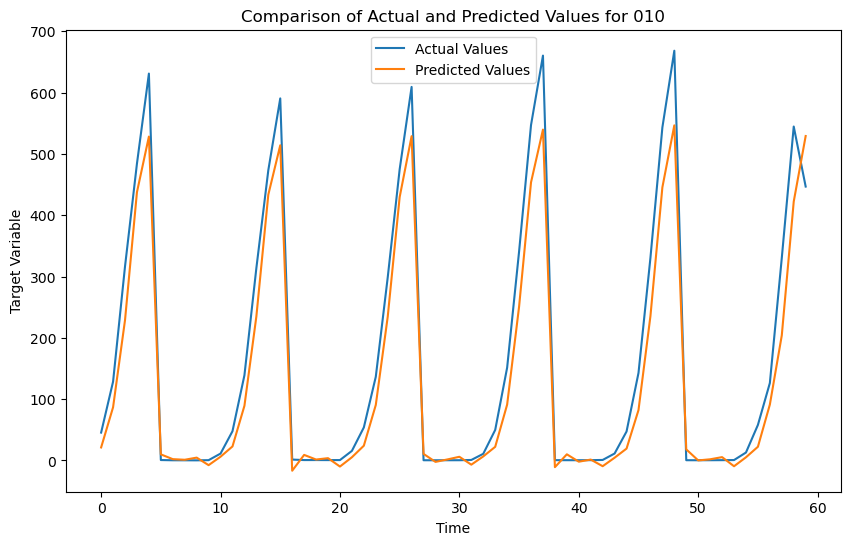

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

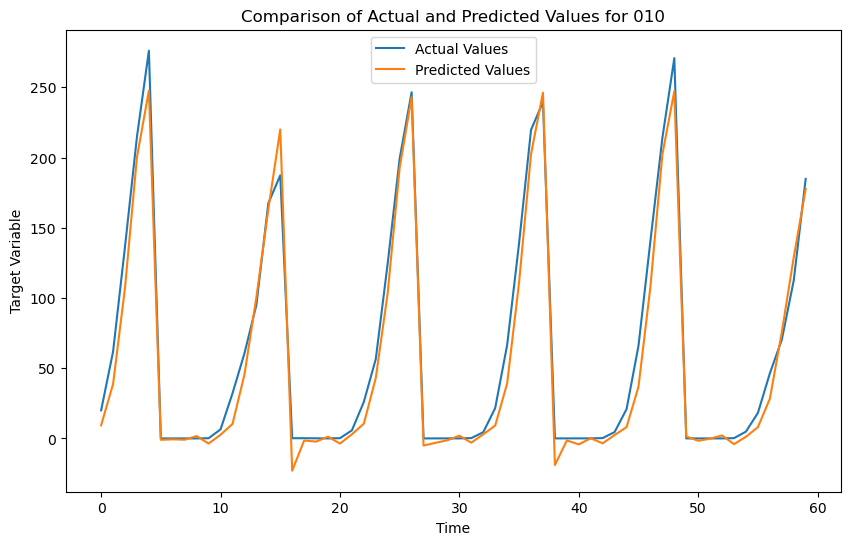

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

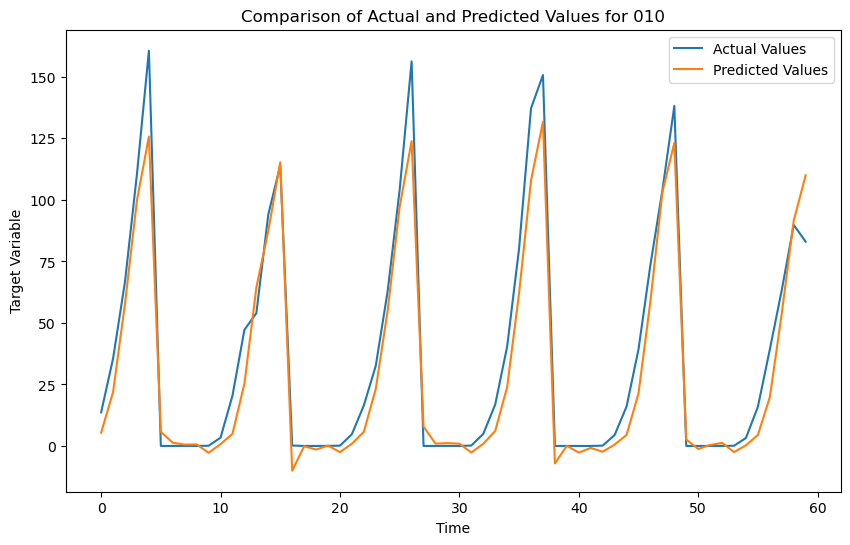

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

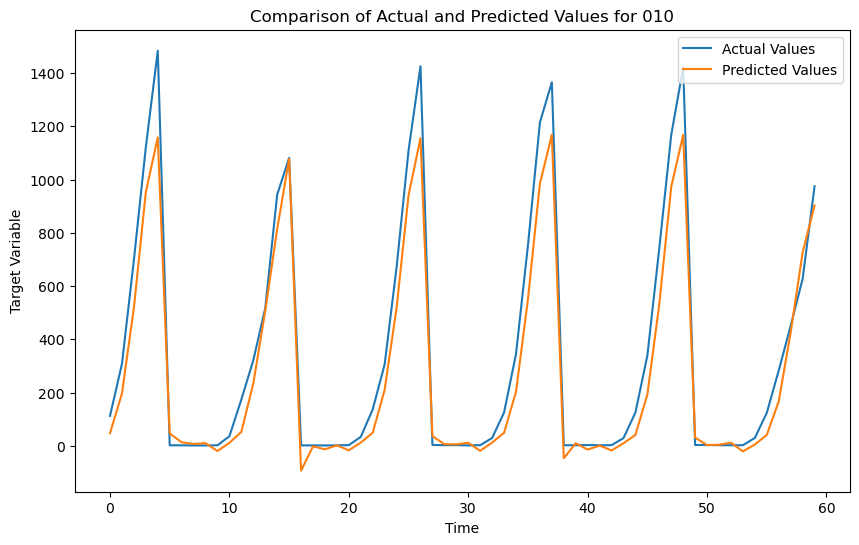

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

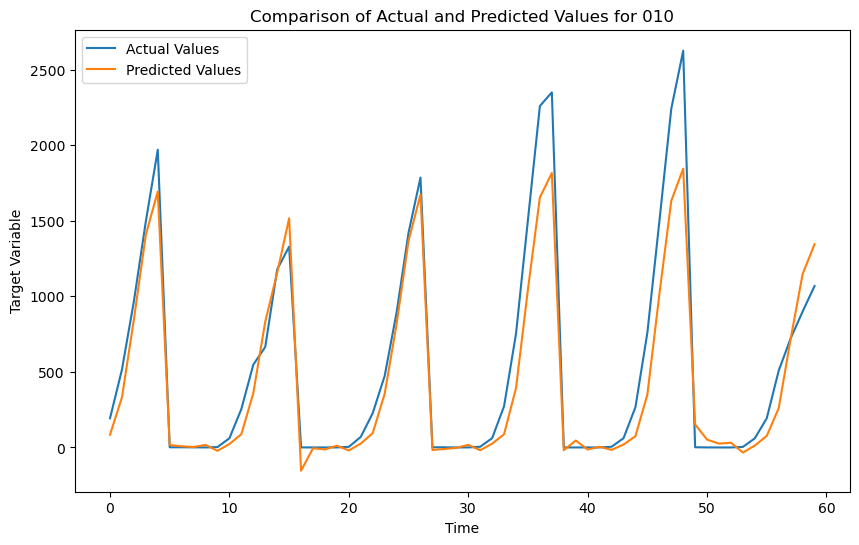

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

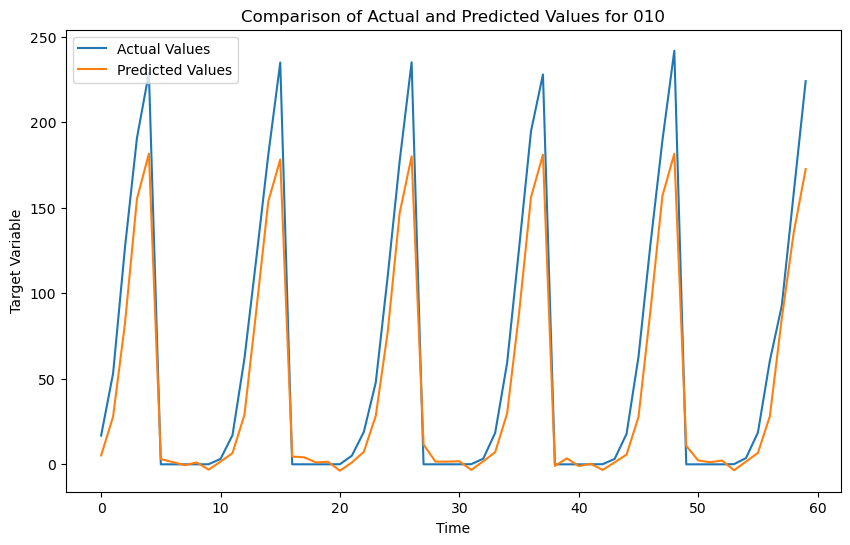

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

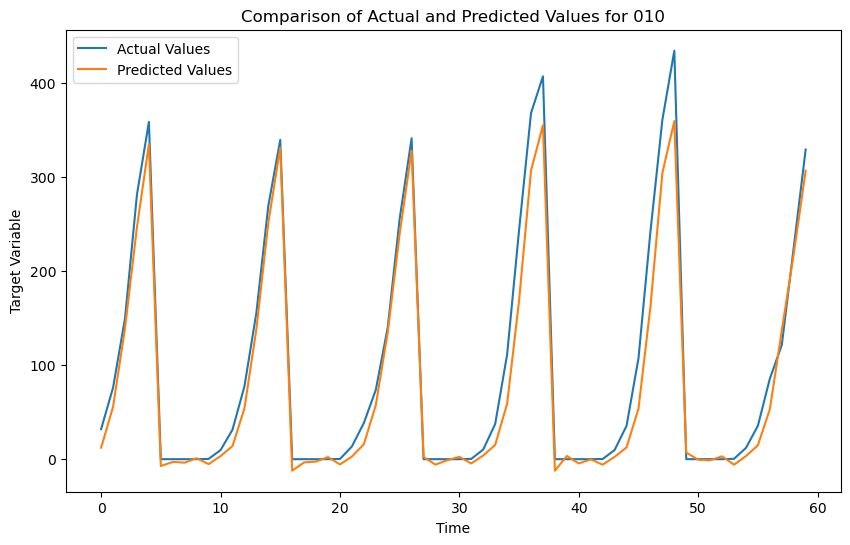


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 

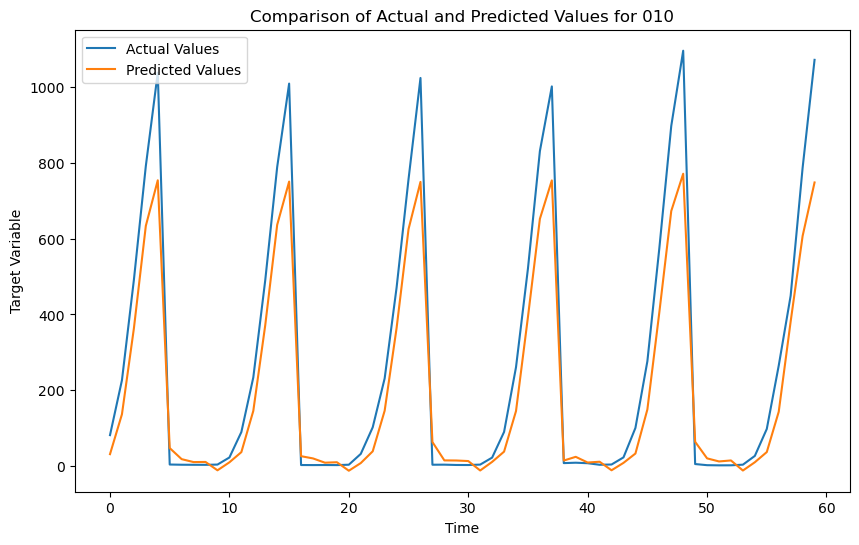

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

{'group': (0, 0, 1), 'r2': 0.7812947913580967, 'mse': 3053.739576720496, 'rmse': 55.260651251324354, 'mae': 32.49557291118701}
{'group': (0, 1, 0), 'r2': 0.8441684677153591, 'mse': 87641.15685890877, 'rmse': 296.0424916442043, 'mae': 199.53378807498615}
{'group': (0, 1, 1), 'r2': 0.787214141401938, 'mse': 25741.001876190017, 'rmse': 160.44002579216328, 'mae': 95.73678903408049}
{'group': (0, 2, 1), 'r2': 0.913036425045761, 'mse': 11.519788322684201, 'rmse': 3.3940813665385514, 'mae': 2.1686064542839927}
{'group': (0, 3, 0), 'r2': 0.8415000203299856, 'mse': 1047877.624298422, 'rmse': 1023.6589394414635, 'mae': 689.8770920015336}
{'group': (0, 3, 1), 'r2': 0.8510554029973688, 'mse': 766339.7155597446, 'rmse': 875.408313622703, 'mae': 543.9799285608768}
{'group': (1, 1, 0), 'r2': 0.9340770339503793, 'mse': 55.59093828536033, 'rmse': 7.455933092870424, 'mae': 4.8837454332828525}
{'group': (1, 3, 0), 'r2': 0.9797536708614233, 'mse': 210.61022189794863, 'rmse': 14.512416128885935, 'mae': 9.8

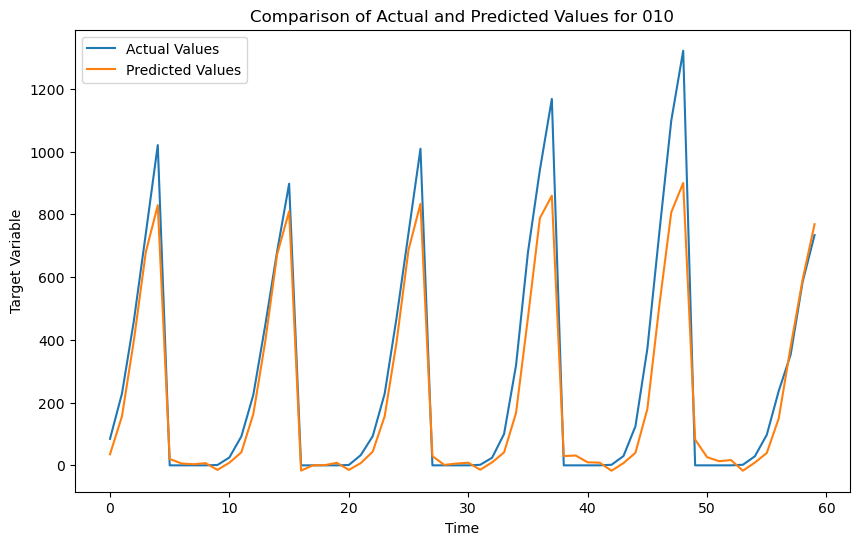

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import matplotlib.pyplot as plt

cols = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']


n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 72
# Filtering for Cluster 2
cluster_data = clustering[clustering['Cluster'] == 2]



# Initialize your scaler and model
scaler = StandardScaler()  # Assuming this should be fitted with training data elsewhere


# Process for each group in Cluster 2
results = []
for group, group_data in cluster_data.groupby(['county', 'product_type', 'is_business']):
    df = group_data[cols].astype(float)
    df_scaled= scaler.fit(df)
    df_scaled = scaler.transform(df)

    testX = []
    testY = []
    for i in range(n_past, len(df_scaled) - n_future + 1):
        testX.append(df_scaled[i - n_past:i])
        testY.append(df_scaled[i + n_future - 1:i + n_future, -1])  # Assuming the last column is still the target

    testX, testY = np.array(testX), np.array(testY)



    n_days_for_prediction = 60



    target_scaler = StandardScaler()
    target_scaler.fit(df[['target']])


# Predict on the last n_days_for_prediction
    prediction_scaled = model.predict(testX[-n_days_for_prediction:])
    prediction = target_scaler.inverse_transform(prediction_scaled)
    actual = target_scaler.inverse_transform(testY[-n_days_for_prediction:])

# Calculate the metrics
    r2 = r2_score(actual, prediction)
    mse = mean_squared_error(actual, prediction)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, prediction)
    results.append({
        'group': group,
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae
    })
    
    for result in results:
        print(result)


# Plotting
    plt.figure(figsize=(10,6))
    plt.plot(actual, label='Actual Values')
    plt.plot(prediction, label='Predicted Values')
    plt.title(f'Comparison of Actual and Predicted Values for 010')
    plt.xlabel('Time')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()



**for the second sample 7,3,1**

In [76]:
df = grouped_data.get_group((0,0,1))

train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [99]:
from keras.regularizers import l2

# Define the columns for training
cols = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']

# Initialize an empty DataFrame to store the scaled data
scaled_data = pd.DataFrame()

df_for_training = train_df[cols].astype(float)
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

trainX = []
trainY = []
n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 72  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])  # Target column is the last one

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

model1 = Sequential()
model1.add(LSTM(10, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), 
              return_sequences=True, kernel_regularizer=l2(0.01)))

model1.add(GRU(256, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
#model1.add(GRU(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
#model1.add(GRU(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
#model1.add(GRU(32, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01)))
#model1.add(Dropout(0.2))
#model1.add(Dense(1, kernel_regularizer=l2(0.01)))  # Output dimension is 1 as we're predicting a single value
model1.add(Dense(1, activation='linear'))

model1.compile(optimizer='adam', loss='mse')
model1.summary()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #print no of GPU device

history=model1.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.1, verbose=1)



plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

trainX shape == (5523, 72, 17).
trainY shape == (5523, 1).


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 72, 10)              │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_30 (GRU)                         │ (None, 72, 256)             │         205,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 72, 1)               │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207,201 (809.38 KB)

 Trainable params: 207,201 (809.38 KB)

 Non-trainable params: 0 (0.00 B)

Num GPUs Available:  0
Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - loss: 1.1306 - val_loss: 0.0642
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - loss: 1.0056 - val_loss: 0.0742
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - loss: 0.9402 - val_loss: 0.0603
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9920

KeyboardInterrupt: 

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model
import matplotlib.pyplot as plt

df_test = test_df[cols].astype(float)



# Use the scaler from the training to transform the test data
df_test_scaled1= scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)

# Initialize the lists for testX and testY
testX = []
testY = []
n_future = 1  # Same as during training
n_past = 72  # Same as during training

# Prepare testX and testY
for i in range(n_past, len(df_test_scaled) - n_future + 1):
    testX.append(df_test_scaled[i - n_past:i])
    testY.append(df_test_scaled[i + n_future - 1:i + n_future, -1])  # Assuming the last column is still the target

testX, testY = np.array(testX), np.array(testY)



n_days_for_prediction = 12



target_scaler = StandardScaler()
target_scaler.fit(df_test[['target']])


# Predict on the last n_days_for_prediction
prediction_scaled = model1.predict(testX[-n_days_for_prediction:])
prediction = target_scaler.inverse_transform(prediction_scaled)
actual = target_scaler.inverse_transform(testY[-n_days_for_prediction:])

# Calculate the metrics
r2 = r2_score(actual, prediction)
mse = mean_squared_error(actual, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, prediction)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Values')
plt.plot(prediction, label='Predicted Values')
plt.title(f'Comparison of Actual and Predicted Values for 010')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Print metrics
print(f"Group: 010")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ghada\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

ValueError: Found input variables with inconsistent numbers of samples: [12, 864]

**the third sample**

In [28]:
columns_to_copy = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']
df = grouped_data.get_group((0,2,1))
# Create a copy of df1 with only the specified columns
df= df[columns_to_copy]

In [37]:


train_size1 = int(len(df) * 0.8)
train = df[:train_size1]
test= df[train_size1:]

In [39]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 640.0 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

In [51]:
from keras.regularizers import l2

# Define the columns for training
cols = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']

# Initialize an empty DataFrame to store the scaled data
scaled_data = pd.DataFrame()

df_for_training = train[cols].astype(float)
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

trainX = []
trainY = []
n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])  # Target column is the last one

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))








trainX shape == (5271, 60, 17).
trainY shape == (5271, 1).


In [53]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

gru_model = keras.models.Sequential([
    keras.layers.GRU(50, activation='selu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True),
    keras.layers.Dropout(0.4),
    keras.layers.GRU(30, activation='selu', return_sequences=True),
    keras.layers.GRU(30, activation='selu', return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(20, activation='selu'),
    keras.layers.Dense(1)
])

# creating a callback that stops trainin when val loss tops increasing after 10 epochs
EarlyStopping_cb = keras.callbacks.EarlyStopping(patience=10)

# compiling the model using mean_squared_error as the loss function and adam as the optimizer
gru_model.compile(loss='mse', optimizer='adam')


In [54]:
gru_history = gru_model.fit(trainX, trainY, epochs=100, validation_split=0.2, 
                           callbacks=EarlyStopping_cb)

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.0004 - val_loss: 0.0589
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5702 - val_loss: 0.0194
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4902 - val_loss: 0.0181
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3527 - val_loss: 0.0074
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3304 - val_loss: 0.0099
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2770 - val_loss: 0.0131
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2639 - val_loss: 0.0121
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3064 - val_loss: 0.0051
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2430 - val_loss: 0.0066
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2144 - val_loss: 0.0063
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1815 - val_loss: 0.0086
Epoch 12/100
132/132 ━━━━━━━━━

In [55]:
gru_df = pd.DataFrame(gru_history.history)
gru_df.head()

loss  val_loss
0  0.881114  0.058938
1  0.541330  0.019416
2  0.441951  0.018122
3  0.366042  0.007432
4  0.352334  0.009869

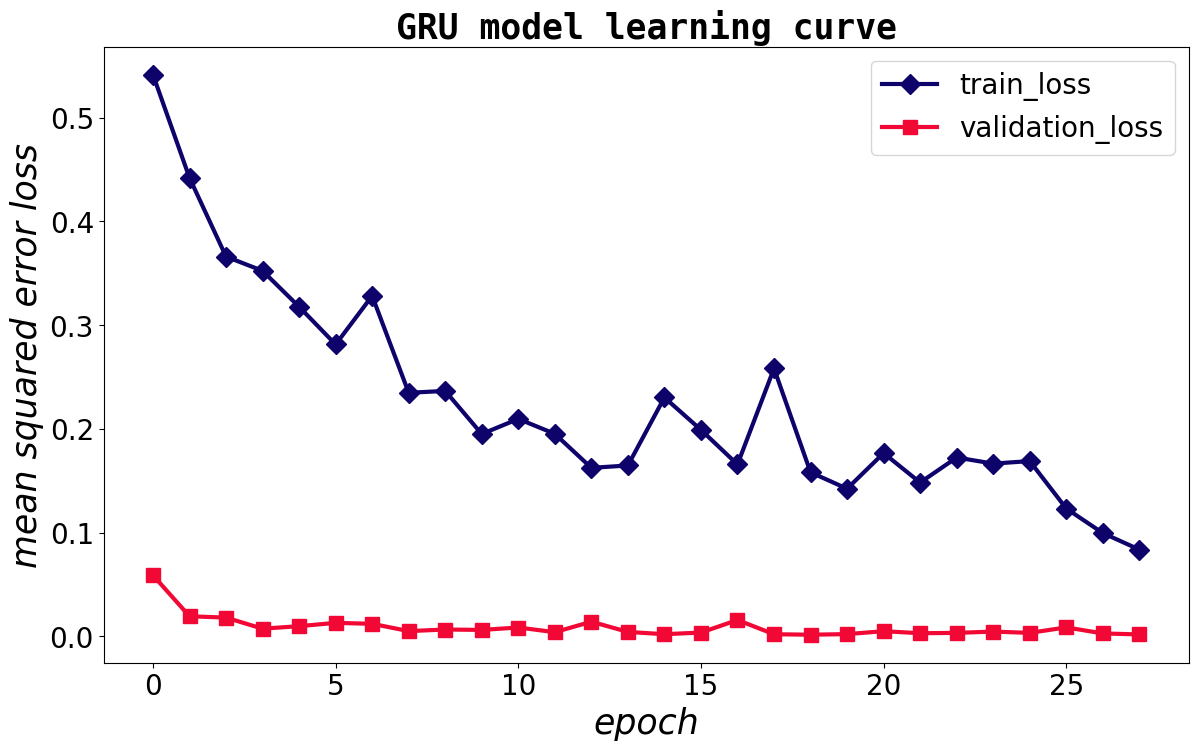

In [56]:
plt.figure(figsize=(14,8))

plt.plot(np.arange(len(gru_df)-1), gru_df['loss'][1:], label='train_loss', color='#0E026B', marker='D', lw=3, markersize=10)
plt.plot(np.arange(len(gru_df)-1), gru_df['val_loss'][:-1], label='validation_loss', color='#F10835', marker='s', lw=3, markersize=10)
plt.title('GRU model learning curve', fontfamily='monospace', fontsize=25, weight='bold', color='k')
plt.xlabel('epoch', style='italic', fontsize=25)
plt.ylabel('mean squared error loss', style='italic', fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


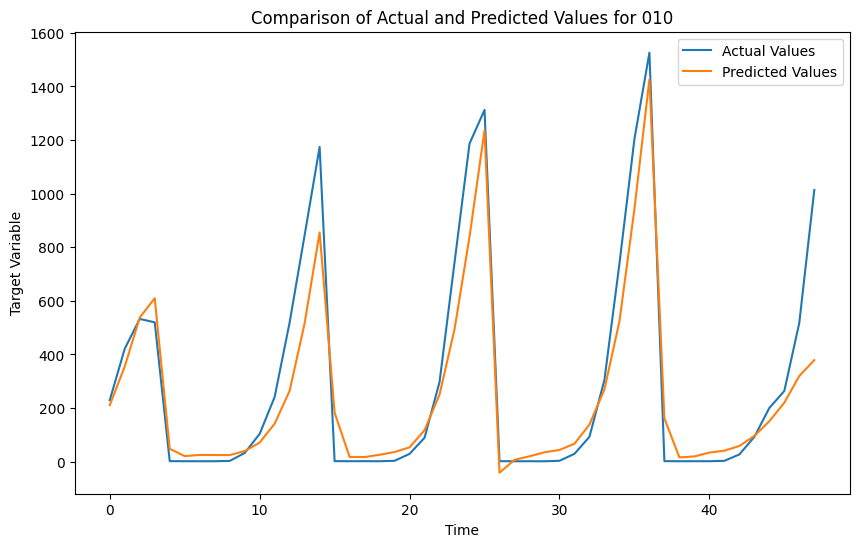

Group: 010
R2 Score: 0.8667819205588826
MSE: 23773.181751950877
RMSE: 154.1855432650898
MAE: 92.86674553958574



In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model
import matplotlib.pyplot as plt

df_test = test_df[cols].astype(float)



# Use the scaler from the training to transform the test data
df_test_scaled1= scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)

# Initialize the lists for testX and testY
testX = []
testY = []
n_future = 1  # Same as during training
n_past = 24  # Same as during training

# Prepare testX and testY
for i in range(n_past, len(df_test_scaled) - n_future + 1):
    testX.append(df_test_scaled[i - n_past:i])
    testY.append(df_test_scaled[i + n_future - 1:i + n_future, -1])  # Assuming the last column is still the target

testX, testY = np.array(testX), np.array(testY)



n_days_for_prediction = 48



target_scaler = StandardScaler()
target_scaler.fit(df_test[['target']])


# Predict on the last n_days_for_prediction
prediction_scaled = gru_model.predict(testX[-n_days_for_prediction:])
prediction = target_scaler.inverse_transform(prediction_scaled)
actual = target_scaler.inverse_transform(testY[-n_days_for_prediction:])

# Calculate the metrics
r2 = r2_score(actual, prediction)
mse = mean_squared_error(actual, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, prediction)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Values')
plt.plot(prediction, label='Predicted Values')
plt.title(f'Comparison of Actual and Predicted Values for 010')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Print metrics
print(f"Group: 010")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")

**the fourth sample**

In [5]:
columns_to_copy = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']
df = grouped_data.get_group((1,3,0))
# Create a copy of df1 with only the specified columns
df= df[columns_to_copy]

In [6]:
train_size1 = int(len(df) * 0.8)
Train = df[:train_size1]
Test= df[train_size1:]

In [7]:
from keras.regularizers import l2

# Define the columns for training
cols = ['eic_count', 'installed_capacity', 'temperature', 'dewpoint',
        'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m',
        'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
        'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh',
        'elect_prices', 'target']

# Initialize an empty DataFrame to store the scaled data
scaled_data = pd.DataFrame()

df_for_training = Train[cols].astype(float)
scaler = StandardScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

trainX = []
trainY = []
n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])  # Target column is the last one

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



trainX shape == (5535, 60, 17).
trainY shape == (5535, 1).


In [12]:
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense
from keras.callbacks import EarlyStopping
import keras.backend as K
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd

K.clear_session()

np.random.seed(35)
tf.random.set_seed(35)

# Your previously defined variables
n_steps = 60  # 60 days of past observations
n_features = len(cols)   # Number of features in trainX

conv_lstm_model2 = Sequential([
    TimeDistributed(Conv1D(filters=93, kernel_size=1, activation='relu'), input_shape=(None,5535,60,17)),
    TimeDistributed(MaxPool1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(50),  # Removed 'activation=relu' for stability
    Dense(1)  # Predicts a single value
])

EarlyStopping_cb = EarlyStopping(patience=10)
conv_lstm_model2.compile(loss='mse', optimizer='adam')

conv_lstm_history2 = conv_lstm_model2.fit(trainX, trainY, epochs=200, validation_split=0.2, callbacks=[EarlyStopping_cb])



ValueError: Kernel shape must have the same length as input, but received kernel of shape (1, 17, 93) and input of shape (None, 5535, 60, 17).

In [ ]:
dataset_train = Train.reset_index()
cols = list(dataset_train)[1:8]
# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['dt'])
datelist_train = [date for date in datelist_train]
training_set = dataset_train.values

In [15]:
Train

eic_count  installed_capacity  temperature  dewpoint  rain  snowfall  \
7              42              472.60         14.0      10.6   0.0       0.0   
65             42              472.60         14.0      10.5   0.0       0.0   
123            42              472.60         13.9      10.7   0.0       0.0   
181            42              472.60         14.1      11.1   0.0       0.0   
239            42              472.60         14.2      11.1   0.0       0.0   
...           ...                 ...          ...       ...   ...       ...   
355743         74              694.19         -2.6      -3.0   0.0       0.0   
355807         74              694.19         -2.8      -3.3   0.0       0.0   
355871         74              694.19         -2.9      -3.4   0.0       0.0   
355935         74              694.19         -3.0      -3.4   0.0       0.0   
355999         74              694.19         -3.0      -3.4   0.0       0.0   

        surface_pressure  cloudcover_total  windspeed_10m  winddirection_10m  \
7                 1015.1              19.0       6.750000              352.0   
65                1015.1              14.0       6.472222              352.0   
123               1014.8               3.0       5.861111              346.0   
181               1014.7              11.0       5.777778              342.0   
239               1014.5               5.0       5.944444              340.0   
...                  ...               ...            ...                ...   
355743            1037.5              90.0       2.750000               46.0   
355807            1037.7              90.0       2.611111               40.0   
355871            1037.8              90.0       2.666667               34.0   
355935            1037.7              90.0       2.944444               35.0   
355999            1037.7              90.0       3.194444               41.0   

        shortwave_radiation  direct_solar_radiation  diffuse_radiation  \
7                       0.0                     0.0                0.0   
65                      0.0                     0.0                0.0   
123                     0.0                     0.0                0.0   
181                     0.0                     0.0                0.0   
239                     0.0                     0.0                0.0   
...                     ...                     ...                ...   
355743                  0.0                     0.0                0.0   
355807                  0.0                     0.0                0.0   
355871                  0.0                     0.0                0.0   
355935                  0.0                     0.0                0.0   
355999                  0.0                     0.0                0.0   

        lowest_price_per_mwh  highest_price_per_mwh  elect_prices  target  
7                      45.23                  46.32         92.51   0.087  
65                     45.23                  46.32         88.90   0.091  
123                    45.23                  46.32         87.35   0.099  
181                    45.23                  46.32         86.88   0.136  
239                    45.23                  46.32         88.43   0.134  
...                      ...                    ...           ...     ...  
355743                 63.00                  68.94         81.43   1.976  
355807                 63.00                  68.94         81.94   1.991  
355871                 63.00                  68.94        108.59   2.169  
355935                 63.00                  68.94         62.25   2.007  
355999                 63.00                  68.94         64.92   2.019  

[5595 rows x 17 columns]

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(Train)
sc_predict = StandardScaler()
sc_predict.fit_transform(Train)

array([[-1.45049071, -1.54665291,  1.04789941, ..., -1.42281052,
        -0.55032723, -0.37095068],
       [-1.45049071, -1.54665291,  1.04789941, ..., -1.42281052,
        -0.58112138, -0.3708761 ],
       [-1.45049071, -1.54665291,  1.03400019, ..., -1.42281052,
        -0.59434324, -0.37072694],
       ...,
       [ 2.19764034,  2.34981392, -1.30106894, ..., -0.99461848,
        -0.41316106, -0.33213276],
       [ 2.19764034,  2.34981392, -1.31496817, ..., -0.99461848,
        -0.80845212, -0.33515317],
       [ 2.19764034,  2.34981392, -1.31496817, ..., -0.99461848,
        -0.78567639, -0.33492944]])

In [28]:
X_train = []
y_train = []
n_future = 1 # Number of days we want to predict into the future.
n_past = 72 # Number of past days we want to use to predict future.
for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i,
                   0:Train.shape[1]])
    y_train.append(training_set_scaled[i+n_future-1:i+n_future, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (5523, 72, 17).
y_train shape == (5523, 1).


In [29]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 17]),
        
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,                      return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=False)),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x * 200)])
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
# lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
optimizer=optimizer,
metrics=["mse"])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 11.0395 - mse: 256.9565 - val_loss: 9.8429 - val_mse: 160.5365
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.5258 - mse: 25.7828 - val_loss: 7.5945 - val_mse: 99.0382
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.3948 - mse: 13.3283 - val_loss: 6.5520 - val_mse: 77.1535
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.8692 - mse: 8.7327 - val_loss: 5.7753 - val_mse: 61.9922
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.5223 - mse: 6.2707 - val_loss: 5.0706 - val_mse: 49.6642
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.2019 - mse: 4.4059 - val_loss: 4.6057 - val_mse: 42.4540
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0196 - mse: 3.4596 - val_loss: 4.3681 - val_mse: 38.6184
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8942 - mse: 2.8564 - val_loss: 4.1712 - val_mse: 35.4874
Epoch 9/100
139/139 ━━━━━━

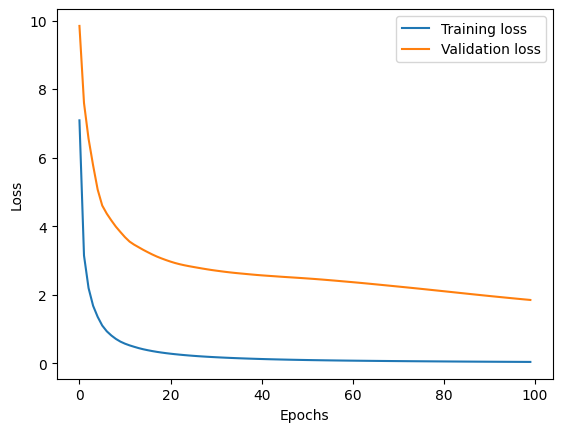

In [34]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

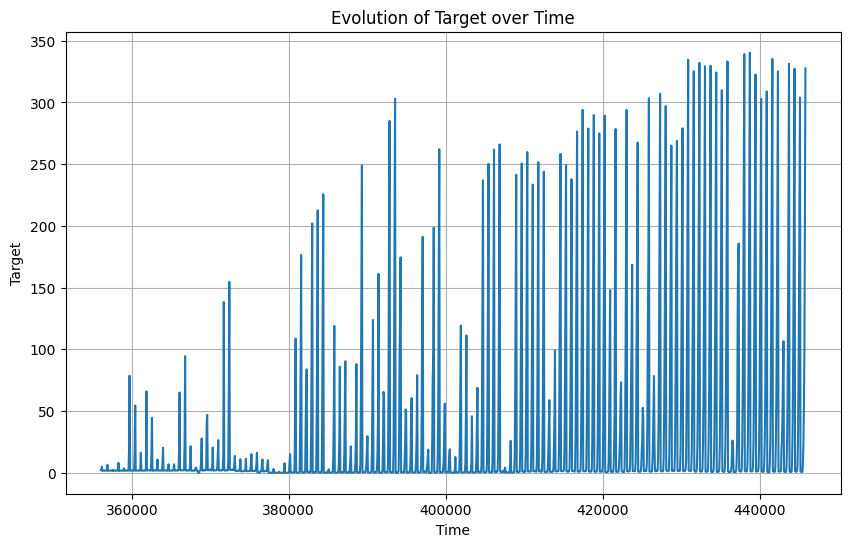

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' is your DataFrame and it includes a 'time' column for the x-axis
# and 'target' column for the y-axis.

# Example: plotting 'target' over 'time'
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.plot( Test['target']) # Customize your plot
plt.title('Evolution of Target over Time') # Add a title
plt.xlabel('Time') # Label the x-axis
plt.ylabel('Target') # Label the y-axis
plt.grid(True) # Add a grid for easier visualization


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
testing_set_scaled = sc.fit_transform(Test)
sc_predict = StandardScaler()
sc_predict.fit_transform(Test)

array([[ 1.10130592,  1.48981088, -1.11205904, ...,  1.70909808,
         0.0909092 , -0.41356363],
       [ 1.10130592,  1.48981088, -1.11205904, ...,  1.70909808,
         0.85973892, -0.41267583],
       [ 1.10130592,  1.48981088, -1.11205904, ...,  1.70909808,
         1.22569131, -0.37257913],
       ...,
       [ 0.56183569, -0.2105121 ,  1.66623773, ..., -1.82423801,
        -1.1418998 ,  1.03522998],
       [ 0.56183569, -0.2105121 ,  1.7796376 , ..., -1.82423801,
        -1.71093929,  2.86369791],
       [ 0.56183569, -0.2105121 ,  1.91193745, ..., -1.82423801,
        -1.72280801,  4.3244696 ]])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


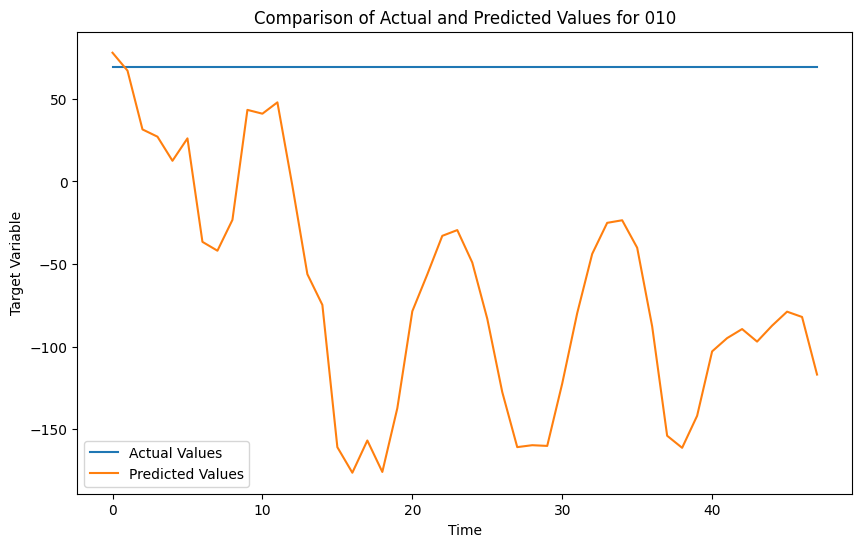

Group: 010
R2 Score: 0.0
MSE: 23473.245156210414
RMSE: 153.20980763714317
MAE: 136.80188504602364



In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model
import matplotlib.pyplot as plt




# Initialize the lists for testX and testY
testX = []
testY = []





n_future = 1 # Number of days we want to predict into the future.
n_past = 72 # Number of past days we want to use to predict future.
for i in range(n_past, len(testing_set_scaled) - n_future +1):
    testX.append(testing_set_scaled[i - n_past:i,
                   0:Test.shape[1]])
    testY.append(testing_set_scaled[i+n_future-1:i+n_future, 0])
testX, testY = np.array(testX), np.array(testY)


n_days_for_prediction = 48






target_scaler = StandardScaler()
target_scaler.fit(Test[['target']])




# Predict on the last n_days_for_prediction
prediction_scaled = model.predict(testX[-n_days_for_prediction:])
prediction = sc_predict.inverse_transform(prediction_scaled)
actual = target_scaler.inverse_transform(testY[-n_days_for_prediction:])

# Calculate the metrics
r2 = r2_score(actual, prediction)
mse = mean_squared_error(actual, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, prediction)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Values')
plt.plot(prediction, label='Predicted Values')
plt.title(f'Comparison of Actual and Predicted Values for 010')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# Print metrics
print(f"Group: 010")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor  # Correct import for KerasRegressor
from sklearn.model_selection import GridSearchCV

# Assuming trainX and trainY are defined somewhere above this snippet

# Define a function to create the Keras model, now including **kwargs to absorb unused arguments
def build_model(optimizer='adam', n_neurons=32, **kwargs):
    model = Sequential()
    model.add(LSTM(n_neurons, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(int(n_neurons / 2), activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Update KerasRegressor to include our hyperparameters
model = KerasRegressor(model=build_model, optimizer='adam', n_neurons=32, verbose=0, scoring='neg_mean_squared_error')


# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam'],
    'n_neurons': [32, 64,128,256]
}

# Create GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_result = grid.fit(trainX, trainY)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



ValueError: 
All the 48 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\USER\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\USER\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 536, in _fit_keras_model
    raise e
  File "c:\Users\USER\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 531, in _fit_keras_model
    key = metric_name(key)
          ^^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\site-packages\scikeras\utils\__init__.py", line 111, in metric_name
    fn_or_cls = keras_metric_get(metric)
                ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\anaconda3\Lib\site-packages\keras\src\metrics\__init__.py", line 204, in get
    raise ValueError(f"Could not interpret metric identifier: {identifier}")
ValueError: Could not interpret metric identifier: loss
